In [1]:
#回溯时外拓一个bp，回溯时包含正常价格，计算平均价格偏离度，交易量，路径长度，机构重复度，
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import networkx as nx
import igraph
import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import math
import matplotlib.colors as mcolors
import os
import pyecharts
from pyecharts.globals import CurrentConfig, OnlineHostType
CurrentConfig.ONLINE_HOST = "..\\..\\..\\..\\pyecharts-assets-master\\assets\\"
from pyecharts import options as opts
from pyecharts.charts import Graph
plt.rcParams["font.sans-serif"]=["SimHei"]



#alldf = pd.read_excel("C:\\Users\\sys\\Downloads\\190210新.xlsx",encoding="GBK")
alldf = pd.read_csv("C:\\Users\\sys\\Downloads\\111.csv")


ModuleNotFoundError: No module named 'igraph'

In [4]:
#alldf["bnds_nm"].unique()
alldf

,dl_cd,txn_dt,byr_trd_acnt_cn_full_nm,slr_trd_acnt_cn_full_nm,bond_cd,bnds_nm,stlmnt_dt,stlmnt_spd_nm,net_prc,nmnl_vol,all_prc,yld_to_mrty,trdng_mthd_cd
0,CBT20220104903365,2022-01-04,江苏昆山农村商业银行股份有限公司,恒丰银行股份有限公司,210215,21国开15,2022-01-05,2,100.3529,10000000.0,101.3274,3.0761,Matching
1,CBT20220104206976,2022-01-04,Legal and General Investment Management Limite...,国泰君安证券股份有限公司,210017,21附息国债17,2022-01-06,3,100.8966,30000000.0,101.2878,2.7852,RFQ
2,CBT20220104207005,2022-01-04,恒丰银行股份有限公司,平安证券股份有限公司,210017,21附息国债17,2022-01-05,2,100.8899,30000000.0,101.2731,2.7860,RFQ
3,CBT20220104305758,2022-01-04,德意志银行(中国)有限公司,东亚银行(中国)有限公司,210013,21附息国债13,2022-01-05,2,100.7549,10000000.0,101.4166,2.7850,Negotiate
4,CBT20220104900193,2022-01-04,厦门银行股份有限公司,山西证券股份有限公司,210215,21国开15,2022-01-05,2,100.2630,10000000.0,101.2375,3.0869,Matching
5,CBT20220104206846,2022-01-04,山西证券股份有限公司,上海东亚期货有限公司-东亚六号单一资产管理计划,210215,21国开15,2022-01-04,1,100.4036,20000000.0,101.3695,3.0700,RFQ
6,CBT20220104206859,2022-01-04,瑞士信贷资产管理(瑞士)有限公司-瑞士信贷指数基金(瑞士)全球复合债券不包括瑞士法郎一到五年...,中国工商银行股份有限公司,210012,21附息国债12,2022-01-06,3,100.1235,2000000.0,100.9762,2.4188,RFQ
7,CBT20220104305611,2022-01-04,德意志银行(中国)有限公司,齐鲁银行股份有限公司,210209,21国开09,2022-01-05,2,100.7277,30000000.0,101.9891,2.9650,Negotiate
8,CBT20220104900218,2022-01-04,浙江绍兴瑞丰农村商业银行股份有限公司,上海银行股份有限公司,210215,21国开15,2022-01-05,2,100.2609,30000000.0,101.2354,3.0872,Matching
9,CBT20220104206288,2022-01-04,安徽宿松农村商业银行股份有限公司,中国国际金融股份有限公司,210215,21国开15,2022-01-04,1,100.3621,10000000.0,101.3280,3.0750,RFQ


In [5]:

datestr="结算日"
amtstr='券面总额'
fromstr="买入方"
tostr="卖出方"
pricestr="到期收益率(%)"
dlmthdstr="报价成交方式"
odateformat="%Y-%m-%d"
dateformat="%Y/%m/%d"
matchingmthdstr="匿名点击"
bondstr="债券名称"

marketpricethres=0.05
price_ratio_min=0.015
single_price_boundary_min=2
traget_price_ratio_min=0.05
path="daichiresult1"

In [6]:

datestr="stlmnt_dt"   #  结算日
trddatestr="txn_dt"   #  场次日期
amtstr='nmnl_vol'      #  票面价值
fromstr="byr_trd_acnt_cn_full_nm" #  买方交易账户中文全称
tostr="slr_trd_acnt_cn_full_nm" #  卖方交易账户中文全称
pricestr="yld_to_mrty"  #  年化收益率
dlmthdstr="trdng_mthd_cd"  #  交易方式代码
odateformat="%Y-%m-%d"
dateformat="%Y/%m/%d"
matchingmthdstr="Matching"
bondstr="bond_cd"    #  债券编号

marketpricethres=0
price_ratio_min=-1
single_price_boundary_min=2
traget_price_ratio_min=0
path="version03"

if not os.path.exists(path):
    os.makedirs(path)

In [7]:
def get_trade_delta(tradedf):
    minprice=int(tradedf[pricestr].min()*100-10)
    maxprice=int(tradedf[pricestr].max()*100+10)
    fanwei=list(range(minprice,maxprice,1))
    fanwei=np.array(fanwei)*0.01
    fenzu=pd.cut(tradedf[pricestr],fanwei,right=False)
    tradedf["label"]=fenzu
    duration=(tradedf[datestr].unique().max()-tradedf[datestr].unique().min())/np.timedelta64(1,'D')
    curdate=tradedf[datestr].unique().min()
    tradedf["day"]=0
    tradedf["平均收益率"]=0
    for i in range(int(duration)+1):
        tradedaydf=tradedf[tradedf[datestr]==curdate]
        #matchingdaydf=tradedaydf[tradedaydf[dlmthdstr]==matchingmthdstr]
        #matchupprice=matchingdaydf[pricestr].max()
        #matchdownprice=matchingdaydf[pricestr].min()
        a=(tradedaydf[amtstr]*tradedaydf[pricestr]).sum()/(tradedaydf[amtstr].sum()+0.000001)
        tradedf.loc[tradedaydf.index,"delta"]=tradedaydf[pricestr].values-a
        tradedf.loc[tradedaydf.index,"deltaabs"]=np.abs(np.array(tradedaydf[pricestr].values-a))
        tradedf.loc[tradedaydf.index,"day"]=i
        tradedf.loc[tradedaydf.index,"平均收益率"]=a
        #tradedf.loc[tradedaydf.index,"out"]=tradedf.loc[tradedaydf.index,pricestr].apply(lambda x: x-matchupprice if x>matchupprice   else (matchdownprice-x if x<matchdownprice else 0))
        curdate=curdate+np.timedelta64(1,'D')
    duration=(tradedf[trddatestr].unique().max()-tradedf[trddatestr].unique().min())/np.timedelta64(1,'D')
    curdate=tradedf[trddatestr].unique().min()
    tradedaydf=tradedf[tradedf[trddatestr]==curdate]
    matchingdaydf=tradedaydf[tradedaydf[dlmthdstr]==matchingmthdstr]
    matchupprice1=matchingdaydf[pricestr].max()
    matchdownprice1=matchingdaydf[pricestr].min()
    matchupprice2=matchupprice1
    matchdownprice2=matchdownprice1
    for i in range(int(duration)+1):
        tradedaydf=tradedf[tradedf[trddatestr]==curdate]
        if len(tradedaydf)>1:
            matchingdaydf=tradedaydf[tradedaydf[dlmthdstr]==matchingmthdstr]
            matchupprice0=matchingdaydf[pricestr].max()
            matchdownprice0=matchingdaydf[pricestr].min()
            matchupprice=max(matchupprice1,matchupprice2,matchupprice0)
            matchdownprice=min(matchdownprice1,matchdownprice2,matchdownprice0)
            tradedf.loc[tradedaydf.index,"out"]=tradedf.loc[tradedaydf.index,pricestr].apply(lambda x: x-matchupprice if x>matchupprice   else (matchdownprice-x if x<matchdownprice else 0))
            matchupprice1=matchupprice0
            matchdownprice1=matchdownprice0
            matchupprice2=matchupprice1
            matchdownprice2=matchdownprice1
        curdate=curdate+np.timedelta64(1,'D')
    tradedf["价格区间"]=tradedf["label"].apply(lambda x: float(x.left))
    tradedf["价格标记"]=tradedf["label"].apply(lambda x: int(x.left*100))
    return tradedf

In [8]:
def caculate_day_trend(tradedf,savepath):
    duration=(tradedf[datestr].unique().max()-tradedf[datestr].unique().min())/np.timedelta64(1,'D')+1
    curdate=tradedf[datestr].unique().min()
    daydf=pd.DataFrame()
    daysamt=[]
    daysdelta=[]
    daysdeltaabs=[]
    days=[]
    daysp=[]
    for i in range(int(duration)+1):
        tradedaydf=tradedf[tradedf[datestr]==curdate]
        if len(tradedaydf)>1:
            daysamt.append(tradedaydf[amtstr].values.sum())
            daysdelta.append((tradedaydf[amtstr].values*tradedaydf["delta"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
            daysdeltaabs.append((tradedaydf[amtstr].values*tradedaydf["deltaabs"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
            daysp.append(tradedaydf["平均收益率"].mean())
            days.append(i)
        curdate=curdate+np.timedelta64(1,'D')
    daydf["amt"]=daysamt
    daydf["delta"]=daysdelta
    daydf["deltaabs"]=daysdeltaabs
    daydf["平均收益率"]=daysp
    daydf.index=days
    tdf=tradedf[tradedf["deltaabs"]>marketpricethres]
    df_grouped=tdf[["label",amtstr]].groupby(["label"]).agg("sum")
    df_grouped.plot(title="Xbond外交易价格分布").get_figure().savefig(savepath+"/"+"Xbond外交易价格分布.png")
    plt.close()
    df_grouped.to_csv(savepath+"/"+"Xbond外交易价格分布.csv",encoding="GBK")
    #df_grouped=tradedf[["label",amtstr]].groupby(["label"]).agg("sum")
   # df_grouped.plot(title="Xbond外交易分布").get_figure().savefig(savepath+"/"+"Xbond外交易分布.png")
    #plt.show()
    #df_grouped.to_csv(savepath+"/"+"Xbond外交易分布.csv",encoding="GBK")
    daydf.to_csv(savepath+"/"+"网络日均指标.csv",encoding="GBK")
    for i in daydf.columns:
        daydf[i].plot(title=i).get_figure().savefig(savepath+"/"+i+".png")
        plt.close()
        #plt.show()
    

In [9]:
def select_price_area(tradedf,savepath):
    #tradedf=dmonthdf.copy()
    targetlist=[]
    targetlist.append([0,0,1000,1,1])
    
    targetdf=pd.DataFrame(targetlist,columns=["中心价格","价格下限","价格上限","异常交易占比","全市场占比"])
    targetdf.to_csv(savepath+"/"+"异常价格区间.csv",encoding="GBK")
    return targetdf
        
    
    

In [10]:
def get_eff_aps(graph_df):
    time_start = time.time()
    # 参数
    edge_attrs = graph_df.columns[2]
    # 边属性
    graph_df = graph_df[graph_df[edge_attrs] > 0]
    # 节点
    start_list = graph_df['start'].value_counts().index
    end_list = graph_df['end'].value_counts().index
    nodes = list(set(list(start_list)+list(end_list)))


    # 重构连接矩阵
    con_matrix = np.zeros([len(nodes), len(nodes)])
    con_matrix_df = pd.DataFrame(con_matrix, index = nodes, columns = nodes)

    for index, row in graph_df.iterrows():
        i = row['start']
        j = row['end']
        con_matrix_df[i][j]  = row[edge_attrs]
    # 计算指标
    def propagation(data):
        lieming = data.index
        a=np.array(data)
        for i in range(len(a[0,:])):
            a[i][i]=1
        a[a>0]=1
        b=a
        itern=5  #度数
        ks=np.zeros((len(a[0,:]),2*itern))
        ksin=np.zeros((len(a[0,:]),2*itern))
        for i in range(itern):
            ks[:,i]=a.sum(1)
            ksin[:,i]=a.sum(0)
            a=np.dot(a,b)
            a[a>0]=1

        last=np.zeros((len(a[0,:])))
        lastv=np.zeros((len(a[0,:])))
        lastin=np.zeros((len(a[0,:])))
        lastvin=np.zeros((len(a[0,:])))
        ef= 1
        coe = np.exp(-1)

        for i in range(itern,2*itern):
            ks[:,i]=lastv+(ks[:,i-itern]-last)*ef
            ksin[:,i]=lastvin+(ksin[:,i-itern]-lastin)*ef
            lastv=ks[:,i]
            last=ks[:,i-itern]
            lastvin=ksin[:,i]
            lastin=ksin[:,i-itern]
            ef = ef * coe
        df = pd.DataFrame()
        df['eff'] = ks[:,9]
        df['effin'] = ksin[:,9]
        df.index = lieming
        return df['eff']


    vertex_df = pd.DataFrame(index = nodes)
    vertex_df['eff'] = propagation(con_matrix_df)



    # 输出
    vertex_df = vertex_df.reset_index()
    return vertex_df

In [11]:
def get_inst_amt_stas(trade_df,savepath):
    nodes = list(set(list(trade_df[fromstr].unique())+list(trade_df[tostr].unique())))
    amt=np.zeros(len(nodes))
    amtv=pd.DataFrame()
    amtv["buy"]=amt
    amtv.index=nodes
    amtv["sell"]=amt
    amtv["rfqbuy"]=amt
    amtv["rfqsell"]=amt
    buyamt=trade_df.groupby([fromstr], as_index=False)[amtstr].sum()
    sellamt=trade_df.groupby([tostr], as_index=False)[amtstr].sum()
    buyamt.index=buyamt[fromstr]
    sellamt.index=sellamt[tostr]
    amtv.loc[buyamt.index,"buy"]=buyamt[amtstr]
    amtv.loc[sellamt.index,"sell"]=sellamt[amtstr]
    amtv["net"]=amtv["buy"]-amtv["sell"]
    outtradedf=trade_df[trade_df[dlmthdstr]!=matchingmthdstr]
    buyamt=outtradedf.groupby([fromstr], as_index=False)[amtstr].sum()
    sellamt=outtradedf.groupby([tostr], as_index=False)[amtstr].sum()
    buyamt.index=buyamt[fromstr]
    sellamt.index=sellamt[tostr]
    amtv.loc[buyamt.index,"rfqbuy"]=buyamt[amtstr]
    amtv.loc[sellamt.index,"rfqsell"]=sellamt[amtstr]
    amtv["rfqnet"]=amtv["rfqbuy"]-amtv["rfqsell"]
    amtv.to_csv(savepath+"/"+"机构交易量统计.csv",encoding="GBK")
    return amtv


In [12]:


def getdaichiinfo(tradedf,minprice,maxprice,savepath):
    #tradedf = pd.read_excel("jiujiang.csv",encoding="GBK")
    #tradedf = pd.read_csv(datapath,encoding="GBK")
    #print(tradedf)
    #tradedf[datestr]=pd.to_datetime(tradedf[datestr],format=dateformat)
    #normaltradedf=tradedf.copy()
    tradedf=tradedf[(tradedf[pricestr]<maxprice) & (tradedf[pricestr]>minprice)]
        #tradedf=tradedf[tradedf["out"]==True]
    tradedf=tradedf[tradedf[dlmthdstr]!=matchingmthdstr]
    tradedf=tradedf[tradedf["out"]>outthres]
    if len(tradedf)<1:
        
        return pd.DataFrame([]),0,0,0,0
    
    tradedf["deltamnt"]=tradedf[amtstr]*tradedf["delta"]
    tradedf["deltaabsmnt"]=tradedf[amtstr]*tradedf["deltaabs"]

    df_grouped = tradedf.groupby([fromstr, tostr], as_index=False)[amtstr].sum()
    graph_df = df_grouped[[fromstr, tostr,amtstr]]
    graph_df.columns = ['start', 'end', 'weight']



    start_list = graph_df['start'].value_counts().index
    end_list = graph_df['end'].value_counts().index
    nodes = list(set(list(start_list)+list(end_list)))
    edge_attrs = graph_df.columns[2]
    graph_df = graph_df[graph_df[edge_attrs] > 0]

    graph_df_reindex = graph_df.set_index(['start','end'])

    edges = []
    page_rank_edges =[]
    closeness_edges = []

    for index, row in graph_df_reindex.iterrows():
        i = index[0]
        j = index[1]
        v = graph_df_reindex.loc[i, j][edge_attrs]

        edges.append((j, i, v ))
        page_rank_edges.append((i, j, v ))
        closeness_edges.append((j, i, 1/v ))


    #构建Graph
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(edges)

    Gm = igraph.Graph.TupleList(edges, directed = True, edge_attrs = 'weight')
    Gm_pagerank = igraph.Graph.TupleList(page_rank_edges, directed = True, edge_attrs = 'weight')
    Gm_closeness = igraph.Graph.TupleList(closeness_edges, directed = True, edge_attrs = 'weight')


    duration=(tradedf[datestr].unique().max()-tradedf[datestr].unique().min())/np.timedelta64(1,'D')+1
    nodesize=len(nodes)
    owndf=pd.DataFrame()
    trademntdf=pd.DataFrame()
    trademntpricedf=pd.DataFrame()
    trademntprice_abs_df=pd.DataFrame()
    lendmntdf=pd.DataFrame()
    curdate=tradedf[datestr].unique().min()
    trademntdf.loc[:,curdate]=np.zeros(nodesize)
    trademntpricedf.loc[:,curdate]=np.zeros(nodesize)
    trademntprice_abs_df.loc[:,curdate]=np.zeros(nodesize)
    lendmntdf.loc[:,curdate]=np.zeros(nodesize)
    trademntdf.index=nodes
    lendmntdf.index=nodes
    trademntpricedf.index=nodes
    trademntprice_abs_df.index=nodes
    owndf.loc[:,curdate]=np.zeros(nodesize)
    owndf.index=nodes
    trademntprice_abs_sum=np.zeros(nodesize)
    for i in range(int(duration)):
        #owndf.loc[:,curdate]=np.zeros(nodesize)
        trademntdf.loc[:,curdate]=np.zeros(nodesize)
        trademntpricedf.loc[:,curdate]=np.zeros(nodesize)
        trademntprice_abs_df.loc[:,curdate]=np.zeros(nodesize)
        lendmntdf.loc[:,curdate]=np.zeros(nodesize)
        tradedaydf=tradedf[tradedf[datestr]==curdate]
        #print(tradedaydf)
        tradedayfromgroupo=tradedaydf.groupby([fromstr], as_index=False)["deltamnt"].sum()
        tradedayfromgroupoa=tradedaydf.groupby([fromstr], as_index=False)["deltaabsmnt"].sum()
        tradedayfromgroup=tradedaydf.groupby([fromstr], as_index=False)[amtstr].sum()
        owndf.loc[tradedayfromgroup[fromstr],curdate]=owndf.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroup[amtstr].values
        trademntdf.loc[tradedayfromgroup[fromstr],curdate]=trademntdf.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroup[amtstr].values
        trademntpricedf.loc[tradedayfromgroup[fromstr],curdate]=trademntpricedf.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroupo["deltamnt"].values
        trademntprice_abs_df.loc[tradedayfromgroup[fromstr],curdate]=trademntprice_abs_df.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroupoa["deltaabsmnt"].values

        lendmntdf.loc[tradedayfromgroup[fromstr],curdate]=lendmntdf.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroup[amtstr].values
        tradedaytogroupo=tradedaydf.groupby([tostr], as_index=False)["deltamnt"].sum()
        tradedaytogroupoa=tradedaydf.groupby([tostr], as_index=False)["deltaabsmnt"].sum()
        tradedaytogroup=tradedaydf.groupby([tostr], as_index=False)[amtstr].sum()
        #print(tradedaytogroup[tostr])
        owndf.loc[tradedaytogroup[tostr],curdate]=owndf.loc[tradedaytogroup[tostr],curdate].values-tradedaytogroup[amtstr].values
        #print(owndf.loc[tradedaytogroup[tostr],curdate].values-tradedaytogroup[amtstr].values)
        trademntdf.loc[tradedaytogroup[tostr],curdate]=trademntdf.loc[tradedaytogroup[tostr],curdate].values+tradedaytogroup[amtstr].values
        trademntpricedf.loc[tradedaytogroup[tostr],curdate]=trademntpricedf.loc[tradedaytogroup[tostr],curdate].values+tradedaytogroupo["deltamnt"].values
        trademntprice_abs_df.loc[tradedaytogroup[tostr],curdate]=trademntprice_abs_df.loc[tradedaytogroup[tostr],curdate].values+tradedaytogroupoa["deltaabsmnt"].values
        
        trademntprice_abs_sum=trademntprice_abs_sum+trademntprice_abs_df.loc[:,curdate].values
        trademntpricedf.loc[:,curdate]=trademntpricedf.loc[:,curdate].values/(trademntdf.loc[:,curdate].values+0.0000001) 
        trademntprice_abs_df.loc[:,curdate]=trademntprice_abs_df.loc[:,curdate].values/(trademntdf.loc[:,curdate].values+0.0000001)
        owndf.loc[:,curdate+np.timedelta64(1,'D')]=owndf.loc[:,curdate].values
        curdate=curdate+np.timedelta64(1,'D')
        
    owndf.loc[:,curdate]=np.array(owndf.values)[:,-1]
    trademntdf.loc[:,curdate]=np.array(trademntdf.values).sum(1)
    trademntpricedf.loc[:,curdate]=np.array(trademntpricedf.values).mean(1)
    trademntprice_abs_df.loc[:,curdate]=trademntprice_abs_sum/trademntdf.loc[:,curdate].values
    lendmntdf.loc[:,curdate]=np.array(lendmntdf.values).sum(1)
    owntraderatiovalue=(np.abs(owndf.loc[:,curdate].values)+0.0001)/trademntdf.loc[:,curdate].values
    lendtraderatiovalue=lendmntdf.loc[:,curdate]/trademntdf.loc[:,curdate]

    Gmv=[]
    for i in Gm.vs:
        Gmv.append(i["name"])
    Gmpv=[]
    for i in Gm_pagerank.vs:
        Gmpv.append(i["name"])
    Gmcv=[]
    for i in Gm_closeness.vs:
        Gmcv.append(i["name"])
    
    result=pd.DataFrame()
    a=Gm.density()
    result.loc["density",0]=a

    a=Gm.assortativity_degree()
    result.loc["assortativity",0]=a

    result_in=pd.DataFrame()
    a=Gm.degree()
    result_in.loc[:,"degree"]=a
    result_in.index=Gmv
    result.loc["avgdegree",0]=np.array(a).mean()

    a=Gm.transitivity_undirected()
    result.loc["transitivity",0]=a

    a=Gm_pagerank.pagerank()
    result_in.loc[Gmpv,"pagerank"]=a
    
    a=Gm.degree(mode="in")
    result_in.loc[Gmv,"indegree"]=a
    
    a=Gm.degree(mode="out")
    result_in.loc[Gmv,"outdegree"]=a

    a=Gm_closeness.betweenness(weights="weight")
    result_in.loc[Gmcv,"betweenness"]=a

    a=get_eff_aps(graph_df)
    result_in.loc[nodes,"eff"]=a["eff"].values
    
    a=Gm_closeness.closeness(weights=Gm_closeness.es['weight'], mode='IN')
    result_in.loc[Gmcv,"closenessin"]=a
    
    a=Gm_closeness.closeness(weights=Gm_closeness.es['weight'], mode='OUT')
    result_in.loc[Gmcv,"closenessout"]=a

    a=Gm.as_undirected().transitivity_local_undirected()
    result_in.loc[:,"localtrans"]=a

    #a=nx.effective_size(G,weight="weight")
    #result_in.loc[nodes,"efficency"]=np.array(list(a.values()))
    #result_in.loc[:,"efficency"]=result_in.loc[:,"efficency"].values/result_in.loc[:,"degree"].values
    #a=nx.effective_size(G,weight="weight")
    #result_in.loc[nodes,"efficency"]=np.array(list(a.values()))
    #result_in.loc[:,"efficency"]=result_in.loc[:,"efficency"].values/result_in.loc[:,"degree"].values
    result_in.loc[nodes,"leadrate"]=lendtraderatiovalue.values
    result_in.loc[nodes,"delta"]=trademntpricedf.loc[:,curdate].values
    result_in.loc[nodes,"deltaabs"]=trademntprice_abs_df.loc[:,curdate].values
    result_in.loc[nodes,"ownmnt"]=owndf.loc[:,curdate].values
    result_in.loc[nodes,"owntraderatio"]=owntraderatiovalue
    result_in.loc[nodes,"trademnt"]=trademntdf.loc[:,curdate].values

    result.loc["avgownmnt",0]=result_in["ownmnt"].mean()
    result.loc["avgleadrate",0]=result_in["leadrate"].mean()
    result.loc["avgdelta",0]=result_in["delta"].mean()
    result.loc["mnt",0]=tradedf[amtstr].values.sum()
    result.loc["avgdeltaabs",0]=(tradedf[amtstr].values*tradedf["deltaabs"].values).sum()/(tradedf[amtstr].sum())
    prefix=savepath
    if not os.path.exists(prefix):
        os.makedirs(prefix)

    result.to_csv(prefix+"/"+"网络指标.csv",encoding="GBK")
    result_in.to_csv(prefix+"/"+"机构指标.csv",encoding="GBK")
    owndf.to_csv(prefix+"/"+"机构持有量.csv",encoding="GBK")
    trademntdf.to_csv(prefix+"/"+"机构交易量.csv",encoding="GBK")
    trademntprice_abs_df.to_csv(prefix+"/"+"日均成交偏差.csv",encoding="GBK")
    lendmntdf.to_csv(prefix+"/"+"机构借出量.csv",encoding="GBK")
    
    #tradedf=tradedf[(tradedf[pricestr]<3.52) & (tradedf[pricestr]>3.49)]
    
    daydf=pd.DataFrame()
    daysamt=[]
    daysdelta=[]
    daysdeltaabs=[]
    days=[]
    for i in tradedf[datestr].unique():
        #print(i)
        tradedaydf=tradedf[tradedf[datestr]==i]
        daysamt.append(tradedaydf[amtstr].values.sum())
        #daysdelta.append((tradedaydf[amtstr].values*tradedaydf["delta"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
        daysdeltaabs.append((tradedaydf[amtstr].values*tradedaydf["deltaabs"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
        days.append(i)
        #curdate=curdate+np.timedelta64(1,'D')
    daydf["amt"]=daysamt
    #daydf["delta"]=daysdelta
    daydf["deltaabs"]=daysdeltaabs
    daydf.index=days
    daydf.to_csv(prefix+"/"+"网络日均指标.csv",encoding="GBK")
    #print(tradedf["label"])
    for i in daydf.columns:
        a=daydf[i].plot(title=i).get_figure().savefig(prefix+"/"+i+".png")
        plt.close()
        #plt.show()
    #tradedf=normaltradedf.copy()
    #tdf=tradedf[tradedf["deltaabs"]>marketpricethres]
    #df_grouped = tdf[["label",amtstr]].groupby(["label"]).agg("sum")
    #df_grouped.plot(title="deltaabs").get_figure().savefig(prefix+"/"+"deltaabs.png")
    #df_grouped.to_csv(prefix+"/"+"deltaabs.csv",encoding="GBK")
    #df_grouped = tradedf[["label",amtstr]].groupby(["label"]).agg("sum")
    #df_grouped.plot(title="allamt").get_figure().savefig(prefix+"/"+"allamt.png")
    #df_grouped.to_csv(prefix+"/"+"allamt.csv",encoding="GBK")
    return result,result_in,owndf,trademntpricedf,owntraderatiovalue

In [13]:


def buy_stats(tradedf,minprice,maxprice,savepath,out):
    if out==True:
        tradedf=tradedf[(tradedf[pricestr]<maxprice) & (tradedf[pricestr]>minprice)]
        #tradedf=tradedf[tradedf["out"]==True]
        tradedf=tradedf[tradedf[dlmthdstr]!=matchingmthdstr]
        tradedf=tradedf[tradedf["out"]>outthres]
    else:
        tradedf=tradedf[(tradedf[pricestr]<maxprice) & (tradedf[pricestr]>minprice)]
        #tradedf=tradedf[tradedf["out"]==True]
        #tradedf=tradedf[tradedf[dlmthdstr]!=matchingmthdstr]
        tradedf=tradedf[tradedf["out"]<outthres]
    start_list = tradedf[fromstr].value_counts().index
    end_list = tradedf[tostr].value_counts().index
    nodes = list(set(list(start_list)+list(end_list)))
    duration=(tradedf[datestr].unique().max()-tradedf[datestr].unique().min())/np.timedelta64(1,'D')+1
    nodesize=len(nodes)
    buydf=pd.DataFrame()
    curdate=tradedf[datestr].unique().min()
    buydf.loc[:,curdate]=np.zeros(nodesize)
    buydf.index=nodes
    for i in range(int(duration)):
        #owndf.loc[:,curdate]=np.zeros(nodesize)
        buydf.loc[:,curdate]=np.zeros(nodesize)
        tradedaydf=tradedf[tradedf[datestr]==curdate]
        #print(tradedaydf)
        tradedayfromgroup=tradedaydf.groupby([fromstr], as_index=False)[amtstr].sum()
        buydf.loc[tradedayfromgroup[fromstr],curdate]=buydf.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroup[amtstr].values
        
        tradedaytogroup=tradedaydf.groupby([tostr], as_index=False)[amtstr].sum()
        #print(tradedaytogroup[tostr])
        buydf.loc[tradedaytogroup[tostr],curdate]=buydf.loc[tradedaytogroup[tostr],curdate].values-tradedaytogroup[amtstr].values
        #print(owndf.loc[tradedaytogroup[tostr],curdate].values-tradedaytogroup[amtstr].values)
       
        #owndf.loc[:,curdate+np.timedelta64(1,'D')]=owndf.loc[:,curdate].values
        curdate=curdate+np.timedelta64(1,'D')
    name=savepath+"/"+"机构净买入量_异常区间.csv"
    if out==False:
        name=savepath+"/"+"机构净买入量_其他区间.csv"
    buydf.to_csv(name,encoding="GBK")    
    #buydf.loc[:,curdate]=np.array(owndf.values)[:,-1]
    

In [14]:
#from dc_model_repo import model_repo
def get_inst_clusters(instdf,savepath):
    if len(instdf)<5:
        instdf.loc[:,'cluster']=1
        return instdf
    df=instdf[["betweenness","leadrate","trademnt","owntraderatio"]]
    scaler = MinMaxScaler()
    transformer = scaler.fit(df)
    df = transformer.transform(df)
    df=pd.DataFrame(df,index=instdf.index,columns=["betweenness","leadrate","trademnt","owntraderatio"])

    km = KMeans(n_clusters=4, max_iter=1000).fit(df)
    df['cluster'] = km.labels_
    instdf.loc[:,'cluster']=km.labels_
    zdf = pd.DataFrame(km.cluster_centers_,index=list(range(4)),columns=list(df.columns[0:-1]))


    kdf=df.copy()
    #df 
    df = zdf.copy()


    #雷达图
    fig = plt.figure(figsize=(20,20))
    #设置极坐标格式
    ax = fig.add_subplot(111, polar=True)

    center_df = df
    max_v = center_df.values.max()
    min_v = center_df.values.min()
    feature = list(center_df.columns)

    N = len(feature)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False)
    angles = np.append(angles, angles[0])

    for i, v in center_df.iterrows():


        angles = np.linspace(0, 2*np.pi, N, endpoint=False)
        center = np.concatenate((v, [v[0]]))
        angles = np.concatenate((angles, [angles[0]]))
        ax.plot(angles, center, 'o-', linewidth=2, label='cat:%d,cnt:%d'%(i+1,v[-1]))
        ax.fill(angles, center, alpha=0.25)
        ax.set_thetagrids(angles*180/np.pi, feature,fontsize=15)
        ax.set_ylim(min_v-0.1, max_v+0.1)
        ax.grid(True)

    plt.title('clusters-center radar map', fontsize=20)
    plt.legend(loc='upper right', frameon = True)
    fig.savefig(savepath+"/机构聚类.png")
    plt.close()
    #plt.show()
    return instdf



In [15]:
def get_candidate_inst(instdf,amtv,savepath):
    #print(len(instdf))
    #print(len(amtv))
    #print(amtv.loc["中信证券股份有限公司"])
    instdf[["net","rfqnet"]]=amtv.loc[instdf.index,["net","rfqnet"]]
    x=int(len(instdf)*0.5)+1
    ids=set(list(instdf.sort_values(by="ownmnt").tail(x).index))
    tt=instdf.loc[ids].copy()
    tt["ownration"]=(tt["ownmnt"]-tt["net"])/(tt["ownmnt"]+1)
    tt["sellnet"]=tt["ownmnt"]-tt["net"]
    sin=tt[tt["sellnet"]<0].index
    tt.loc[sin,"sellnet"]=0
    xx=tt["ownmnt"]-tt["sellnet"]
    xin=xx[xx<0].index
    tt.loc[xin,"sellnet"]=tt.loc[xin,"ownmnt"]
    tt["ownration"]=(tt["sellnet"])/(tt["net"]+1)
    #index=tt[tt["ownration"]<0].index
    #tt.loc[index,"ownration"]=tt.loc[index,"ownration"].abs()+1
    #print(tt.loc["山西证券股份有限公司"])
    x=int(len(instdf)*0.4)+1
    nids=set(list(tt.sort_values(by="deltaabs").tail(x).index)).intersection(set(list(tt.sort_values(by="ownmnt").tail(x).index)))#.intersection(set(list(tt.sort_values(by="ownration").tail(100).index)))
    #print(ttt.loc["山西证券股份有限公司"])
    ttt=tt.loc[nids]
    #print(ttt["ownmnt"].min())
    #print(ttt["deltaabs"].min())
    x=int(len(instdf)*0.3)+1
    #y=int(len(instdf)*0.2)+1
    if x>20:
        x=20
    targetinst=set(ttt.sort_values(by="sellnet").tail(x).index).union(ttt.sort_values(by="ownmnt").tail(x).index)#.intersection(ttt.sort_values(by="deltaabs").tail(x).index)
    ttt.to_csv(savepath+"/"+"可疑机构指标.csv",encoding="GBK")
    return targetinst

In [16]:
def construct_graph(tradedf,minprice,maxprice):
    #normaltradedf=tradedf.copy()
    #outthres=0.01
    tradedf=tradedf[(tradedf[pricestr]<maxprice) & (tradedf[pricestr]>minprice)]
    tradedf=tradedf[tradedf[dlmthdstr]!=matchingmthdstr]
    #tradedf=tradedf[((tradedf[fromstr].isin(multinodes)) |  (tradedf[tostr].isin(multinodes)))]
    #tradedf=tradedf[tradedf["out"]>outthres]
    outtradedf=tradedf.copy()
    outtradedf=outtradedf[outtradedf["out"]>outthres]
    duration=(tradedf[datestr].unique().max()-tradedf[datestr].unique().min())/np.timedelta64(1,'D')+1
    start_list = tradedf[fromstr].value_counts().index
    end_list = tradedf[tostr].value_counts().index
    nodes = list(set(list(start_list)+list(end_list)))
    nodesize=len(nodes)
    owndf=pd.DataFrame()
    savedf=tradedf.copy()
    curdate=tradedf[datestr].unique().min()
    owndf.loc[:,"pre"]=np.zeros(nodesize).astype(int)
    owndf.index=nodes
    owndf.loc[:,curdate]=np.zeros(nodesize)
    nodecolor=["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"]
    trademntprice_abs_sum=np.zeros(nodesize)
    tradedayindex=0
    nodelist=[]
    linklist=[]
    daydict={}
    nodedict={}
    edgedict={}


    df_grouped = tradedf.groupby([fromstr, tostr], as_index=False)[amtstr].sum()
    graph_df = df_grouped[[fromstr, tostr,amtstr]]
    graph_df.columns = ['start', 'end', 'weight']
    #owndf.loc[:,curdate]=np.zeros(nodesize)

    start_list = graph_df['start'].value_counts().index
    end_list = graph_df['end'].value_counts().index
    nodes = list(set(list(start_list)+list(end_list)))
    edge_attrs = graph_df.columns[2]
    graph_df = graph_df[graph_df[edge_attrs] > 0]

    graph_df_reindex = graph_df.set_index(['start','end'])

    edges1 = []

    for index, row in graph_df_reindex.iterrows():
        i = index[0]
        j = index[1]
        v = graph_df_reindex.loc[i, j][edge_attrs]

        edges1.append([j, i, v/1000000 ])





    newindex=0
    edgedict[-1]=set([])
    daynodename={}
    for i in range(int(duration)):

        #owndf.loc[:,curdate]=np.zeros(nodesize)
        tradedaydf=tradedf[tradedf[datestr]==curdate]
        outtradedaydf=outtradedf[outtradedf[datestr]==curdate]
        if(len(tradedaydf)>0):
            #print(curdate)
            daydict[tradedayindex]=curdate
            df_grouped = tradedaydf.groupby([fromstr, tostr,pricestr], as_index=False)[amtstr].sum()
            #df_grouped1 = tradedaydf.groupby([fromstr, tostr], as_index=False)[pricestr].mean()
            graph_df = df_grouped[[fromstr, tostr,pricestr,amtstr]]
            graph_df.columns = ['start', 'end',"price" ,'weight']
            #graph_df[pricestr]=df_grouped1[pricestr]
            #owndf.loc[:,curdate]=np.zeros(nodesize)
            owndf.loc[:,curdate]=owndf.loc[:,owndf.columns[-1]].values
            preownindex=owndf[owndf[curdate]>0].index

            start_list = graph_df['start'].value_counts().index
            end_list = graph_df['end'].value_counts().index
            daynodes = list(set(list(start_list)+list(end_list)))
            follownodes=list(set(preownindex)& set(daynodes))
            #print(len(daynodes))
            for j in daynodes:
                #print(j+"_"+str(tradedayindex))
                nodedict[j+"_"+str(tradedayindex)]=set([])
                edgedict[j+"_"+str(tradedayindex)]=set([])
            #print(nodedict)
            #for j in follownodes:
                #linklist.append(opts.GraphLink(source=j+"_"+str(owndf.loc[j,"pre"]),target=j+"_"+str(tradedayindex),value=owndf.loc[j,curdate]/1000000))
                #source=j+"_"+str(owndf.loc[j,"pre"])
                #target=j+"_"+str(tradedayindex)
                #edgename=-1
                #linklist.append([source,target,owndf.loc[j,curdate]/1000000,0])
                #newindex=newindex+1
                #nodedict[source].add(edgename)
                #nodedict[target].add(edgename)
                #edgedict[edgename]=set([])
                #print(owndf.loc[j,curdate])



            edge_attrs = graph_df.columns[3]
            #print(graph_df)
            graph_df = graph_df[graph_df[edge_attrs] > 0]

            graph_df_reindex = graph_df

            edges = []
            page_rank_edges =[]
            closeness_edges = []
            #print(graph_df_reindex)

            for node in daynodes:
                if node in follownodes:
                    daynodename[node]=node+"_"+str(owndf.loc[node,"pre"])
                else:
                    daynodename[node]=node+"_"+str(tradedayindex)
            for index, row in graph_df_reindex.iterrows():
                j = row["start"]
                k = row["end"]
                l= row["price"]
                v = row["weight"]
                o=row["out"]
                source=daynodename[k]
                target=daynodename[j]

                #print(index)
                #edgename=index
                linklist.append([source,target,v/1000000,l,tradedayindex,o])
                edgename=source+"#"+target+"#"+str(l*10000)+"#"+str(tradedayindex)
                #if edgename in nodedict[source]:
                    #print(edgename)
                nodedict[source].add(edgename)
                nodedict[target].add(edgename)
                edgedict[edgename]=set(list(tradedaydf[(tradedaydf[fromstr]==j)& (tradedaydf[tostr]==k)& (tradedaydf[pricestr]==l)].index))

                #print()
                #linklist.append(opts.GraphLink(source=k+"_"+str(tradedayindex),target=j+"_"+str(tradedayindex),value=str(v/1000000)))

                #print("#"+str(v))
            #for j in daynodes:
                #if j in result_in.index:
                    #nodelist.append({'name' : j+"_"+str(tradedayindex), "itemStyle":{"color": nodecolor[result_in.loc[j,"cluster"]]}})
                #else:
                    #nodelist.append({'name' : j+"_"+str(tradedayindex), "itemStyle":{"color": nodecolor[-1]}})

            preownindex_neg=owndf[owndf[curdate]<=0].index
            tradedayfromgroup=tradedaydf.groupby([fromstr], as_index=False)[amtstr].sum()
            owndf.loc[tradedayfromgroup[fromstr],curdate]=owndf.loc[tradedayfromgroup[fromstr],curdate].values+tradedayfromgroup[amtstr].values
            tradedaytogroup=tradedaydf.groupby([tostr], as_index=False)[amtstr].sum()
            owndf.loc[tradedaytogroup[tostr],curdate]=owndf.loc[tradedaytogroup[tostr],curdate].values-tradedaytogroup[amtstr].values
            #owndf.loc[:,curdate+np.timedelta64(1,'D')]=owndf.loc[:,curdate].values
            ownindex=owndf[owndf[curdate]<=0].index
            ownindex_p=owndf[owndf[curdate]>0].index
            ownchange=list(set(list(preownindex_neg)).intersection(set(list(ownindex_p))))
            owndf.loc[ownindex,curdate]=0
            owndf.loc[ownindex,"pre"]=-1
            owndf.loc[ownchange,"pre"]=tradedayindex

            tradedayindex=tradedayindex+1
        #print(tradedaydf)


        curdate=curdate+np.timedelta64(1,'D')
    #tradedf=normaltradedf.copy()
    return daydict,nodedict,edgedict,linklist,daynodename,savedf

In [17]:
def getdict(inindex,a):
    indict={}
    inde=len(inindex)
    inva=a.loc[inindex,"value"].values
    for i in range(pow(2,inde)):
        t=0
        indexi=i
        for j in range(inde-1,-1,-1):
            if indexi&1>0:
                t=t+inva[j]
            indexi=indexi>>1
        if t in indict.keys():
            indict[t].add(i)
        else:
            indict[t]=set([i])
    return indict

findthres=0.01



def chooseedge(node,index,amt,a,price):
    indf=(a[a["to"]==node]).copy()
    outdf=a[a["from"]==node]
    #amt=a.loc[index,"value"]
    day=a.loc[index,"day"]
    inindex=indf.index
    if(len(inindex)==0):
        return []
    #if(len(inindex)==1):
        #return list(inindex)
    #prices=np.array(indf[pricestr].values)
    dd=day-np.array(indf["day"].values)
    #if index==386:
        #print(indf)
    #dd[dd>0]=10000
    indf["dd"]=dd
    indf=indf[indf["dd"]>=0]
    #if index==386:
        #print(indf)
    pd=np.abs(np.array(indf[pricestr].values)-price)
    pd[pd<=0.005]=0
    indf["pd"]=pd
    indf=indf[indf["pd"]<=findthres]
    if(len(indf.index)==0):
        return []
    
    
    ad=np.array(indf["value"].values)-amt
    maxad=max(ad)
    indf["ao"]=ad
    indf["ad"]=np.abs(ad)
    indf.loc[indf[indf["ao"]<0].index,"ad"]=indf.loc[indf[indf["ao"]<0].index,"ad"]+maxad
    indf=indf.sort_values(by=["pd","dd","ad"])
    return list(indf.index)




In [18]:
def draw_trace_graph(paths,point,savepath):
    a=np.concatenate(paths)
    a=pd.DataFrame(a[:,1:4],columns=["from","to","value"])
    a["value"]=a["value"].apply(lambda x: float(x))
    start_list = a["from"].value_counts().index
    end_list = a["to"].value_counts().index
    fromamtdf=a.groupby("from")["value"].agg("sum")
    toamtdf=a.groupby("to")["value"].agg("sum")
    nod=list(set(list(start_list)+list(end_list)))
    nodelist1=[]
    linklist1=[]
    set1=list(set.intersection(set(start_list),set(end_list)))
    #print(set1)
    #print(len(set1))
    setl=[]
    for i in set1:
        if ~(fromamtdf.loc[i]==toamtdf.loc[i]):
            setl.append(i)
    set1=list(set(set1)-set(setl))
    #print(set1)
    #print(len(set1))
    nods=[]
    edgs=[]
    for i in nod:
        am1=0
        am2=0
        am=5
        if i in toamtdf.index:
            am2=toamtdf.loc[i]
        else:
            am2=0
        if i in fromamtdf.index:
            am1=fromamtdf.loc[i]
        else:
            am1=0
        if(am2-am1)/10>5:
            am=(am2-am1)/10
        else:
            am=5
        if (i in set1):
            nodelist1.append({'name' : i,"symbolSize":am,"itemStyle":{"color":"#9467bd"}})
            nods.append([i,float(am2-am1)])
        else:
            nodelist1.append({'name' : i,"symbolSize":am,"itemStyle":{"size":500}})
            nods.append([i,float(am2-am1)])
    for i in a.index: 
        linklist1.append(opts.GraphLink(source=a.loc[i,"from"],target=a.loc[i,"to"],value=a.loc[i,"value"]))

    #prefix=path+"/"+pre
    c=(
        Graph(init_opts=opts.InitOpts(width='4000px',height='2400px'))
        .add(
            "",
            nodelist1,
            linklist1, 
            repulsion=5000, 
            label_opts=opts.LabelOpts(font_size=10), 
            edge_symbol=["circle","arrow"], 
            edge_label=opts.LabelOpts(is_show=True, 
            position="middle", 
            formatter="{c}",font_size=5)
        )
        .set_global_opts()
        .render(savepath+"/"+point+"_trace_network.html")
    )

In [19]:
#昌图县农村信用合作联社_4
#浦发银行悦盈利系列之6个月定开型H款理财计划_0
#上海东亚期货有限公司-东亚十七号单一资产管理计划_2
#中国国际金融股份有限公司_3
def trace_trade_chains(linklist,daydict,nodedict,edgedict,savepath,daynodename,targetinst,savedf):
    b=pd.DataFrame(linklist,columns=["from","to","value",pricestr,"day","out"])

    for inst in targetinst:
        point=daynodename[inst]
        
        a=b.copy()    
        #nmts=np.array(nods)
        #point=nmts[nmts[:,1]==str(nmts[:,1].astype(float).max()),0][0]

        #print(point)

        visit=list(a[(a["to"]==point)& (a["out"]>outthres)].index) #当前访问节点
        #ramnt=a[a["to"]==point]["value"].sum()-a[a["from"]==point]["value"].sum() #剩余总量
        visitmnt=list(a[a["to"]==point]["value"].values) #当前可传递量
        visitmntget=list(np.zeros(len(visit)))   #当前传递量
        paths=[]
        depths=list(np.zeros(len(visit)))
        pairs={}
        #print(visit)
        #print(visitmnt)
        #print(visitmntget)
        #print(depths)
        xt=False
        circle=False
        pathid=0
        while((len(visit)>0)):
            #print(cur
            cur=visit[-1]
            #print(cur)
            curmnt=visitmnt[-1]
            curdepth=depths[-1]
            snode=a.loc[cur,"from"]
            tnode=a.loc[cur,"to"]
            tprice=a.loc[cur,pricestr]
            inindex=chooseedge(snode,cur,curmnt,a,tprice)
            #allindex.append(snode)
            #print(inindex)
            #inindex=a[a["to"]==cur].index
            #print(cur)
            ta=a[(a[pricestr]<=(tprice+findthres))&(a[pricestr]>=(tprice-findthres))]
            amt=ta[ta["from"]==snode]["value"].sum()-ta[ta["to"]==snode]["value"].sum()
            #print(snode)
            #print(amt)
            while (len(inindex)>0):
                if inindex[0] in visit:
                    inindex.remove(inindex[0])
                    if len(inindex)==0:
                        circle=True
                else:
                    break
            while (len(inindex)>0) :
                #print(a.loc[cur,"from"],a.loc[cur,"to"])
                visit.append(inindex[0])
                visitmnt.append(min(a.loc[inindex[0],"value"],curmnt))
                depths.append(curdepth+1)
                inindex.remove(inindex[0])
                pairs[cur]=inindex
                visitmntget.append(0)
                cur=visit[-1]
                curmnt=visitmnt[-1]
                curdepth=depths[-1]
                snode=a.loc[cur,"from"]
                tnode=a.loc[cur,"to"]
                cprice=a.loc[cur,pricestr]
                #print("123"+snode)
                inindex=chooseedge(snode,cur,curmnt,a,cprice)
                pairs[cur]=inindex
                #print("1r"+str(cur))
                #print(2)
                #print(inindex)
                while (len(inindex)>0):
                    if inindex[0] in visit:
                        inindex.remove(inindex[0])
                        if len(inindex)==0:
                            circle=True
                    else:
                        break
                pairs[cur]=inindex
                ta=a[(a[pricestr]<=(cprice+findthres))&(a[pricestr]>=(cprice-findthres))]
                amt=ta[ta["from"]==snode]["value"].sum()-ta[ta["to"]==snode]["value"].sum()
                if amt>0:
                    break
            #print("amt"+str(amt))
            if circle==False:  #找到一个净融出节点
                if amt>0:
                    vol=min(curmnt,amt)
                else:
                    vol=curmnt
                #print("vol"+str(vol))
                #ramnt=ramnt-vol
                #print("ramnt"+str(ramnt))
                #paths.append([cur,visitmntget[n]+vol])
                n=len(visit)-1
                while (curdepth>0): #循环减去已经用掉的量
                    #cur=visit[n]
                    a.loc[cur,"value"]=a.loc[cur,"value"]-vol

                    visitmnt[n]=visitmnt[n]-vol
                    visitmntget[n]=visitmntget[n]+vol
                    n=n-1
                    curdepth=depths[n]
                    cur=visit[n]
                a.loc[cur,"value"]=a.loc[cur,"value"]-vol
                visitmnt[n]=visitmnt[n]-vol
                visitmntget[n]=visitmntget[n]+vol
            #print("visitmntget")
            #print(visitmntget)
            #print(visitmnt)
            #print(pairs[visit[-1]])
            else:        #找到环节点或者正融出节点
                #print("circle")
                circle=False
                if(len(visit)>0):
                #print(len(visit))
                #print(len(visitmnt))
                #循环减掉量已经用完的路径
                    cur=visit[-1]
                    entry=a.loc[cur,"from"]
                    cto=a.loc[cur,"to"]
                    vs=[]
                    n=len(visit)-1
                    while (cto!=entry): #循环减去已经用掉的量
                        vs.append(a.loc[cur,"value"])
                        #print("c"+str(cur))
                        n=n-1
                        cur=visit[n]
                        cto=a.loc[cur,"to"]
                    vs.append(a.loc[cur,"value"])
                    #print("c"+str(cur))
                    minv=min(vs)
                    cur=visit[-1]
                    cto=a.loc[cur,"to"]
                    while (cto!=entry): #循环减去已经用掉的量
                        #cur=visit[n]
                        a.loc[cur,"value"]=a.loc[cur,"value"]-minv
                        if a.loc[cur,"value"]==0:
                            a.drop(cur,inplace=True)

                        visit.pop()
                        visitmnt.pop()
                        depths.pop()
                        visitmntget.pop()
                        cur=visit[-1]
                        cto=a.loc[cur,"to"]
                    a.loc[cur,"value"]=a.loc[cur,"value"]-minv
                    #visit.pop()
                    #visitmnt.pop()
                    #depths.pop()
                    #visitmntget.pop()


            if visitmntget[-1]>0: #添加新的路径
                cur=visit[-1]
                pathid=pathid+1
                paths.append([cur,visitmntget[-1],pathid])
                #print("a",b.loc[cur,"from"],b.loc[cur,"to"],paths[-1][1])
            if a.loc[cur,"value"]==0: #删除已经量已经消失的边
                a.drop(cur,inplace=True)
                #print("1d"+str(cur))
            #print(visit)
            #print("pop")
            visit.pop()
            #print(visit)
            visitmnt.pop()
            visitmntget.pop()
            depths.pop()
            if(len(visit)>0):
                #print(len(visit))
                #print(len(visitmnt))
                #循环减掉量已经用完的路径
                while ((len(visitmnt)>0)):
                    if (visitmnt[-1]>0 ):
                        break
                    cur=visit.pop()
                    if visitmntget[-1]>0:
                        paths.append([cur,visitmntget[-1],pathid])
                        #print("b",b.loc[cur,"from"],b.loc[cur,"to"],paths[-1][1])
                    if a.loc[cur,"value"]==0:
                        a.drop(cur,inplace=True)
                        #print("2d"+str(cur))
                    visitmnt.pop()
                    depths.pop()
                    visitmntget.pop()
            #visitmntget.pop()
        #print(len(visit))
        while len(visit)>0:
            cur=visit.pop()
            if visitmntget[-1]>0:
                paths.append([cur,visitmntget[-1]])
            visitmnt.pop()
            depths.pop()
            visitmntget.pop()
        pathlist=[]
        titles=[]
        pathindex=[]
        pathvalues=[]
        #sellectdedgeskeys=[]
        #print(len(paths))
        if(len(paths)>10):
            print("###########"+savepath+"/"+point+str(outthres)+".csv"+"###########")
        for j in range(len(paths)):
            x=paths[j][0]
            source=b.loc[x,"from"]
            target=b.loc[x,"to"]
            day=b.loc[x,"day"]
            price=b.loc[x,pricestr]
            idss=paths[j][2]
            key=source+"#"+target
            key1=source+"#"+target+"#"+str(price*10000)+"#"+str(day)


            value=paths[j][1]
            ss=str.split(source,"_")
            ts=str.split(target,"_")
            #title=np.array([[str(i),tname,sname,value*1000000,0]])
            title=np.array([[str(day),target,source,value*1000000,idss]])
            titles.append(np.array([[str(day),source,target,value,idss]]))
            pathlist.append(title)
            index=list(edgedict[key1])
            #print(edgesets[i])
            #if i==51:
                #print(index)
            if (len(index)>0) & (ss[0]!=ts[0]):
                pathlist.append(np.array(savedf[[datestr,fromstr,tostr,amtstr,pricestr]].loc[index].values))
        #print(np.concatenate(titles))
        #print(pathlist)
        #print(point)
        if(len(pathlist)>0):
            pathdf=pd.DataFrame(np.concatenate(pathlist),columns=[datestr,fromstr,tostr,amtstr,pricestr])

            draw_trace_graph(titles,point,savepath)
            pathdf.to_csv(savepath+"/"+str(len(paths))+"_"+point+str(outthres)+".csv",encoding="GBK")
        #a=b.copy()      

In [20]:


selectedbonds=alldf["bond_cd"].unique()
#selectedbonds=['22国开10', '22附息国债09',
       #'22附息国债10', '22国开17', '22国开06', '22附息国债11', '22附息国债12', '22国开08']
selectedbonds=[210012,210017,220004,220007,220010,220203,220205]
#selectedbonds=['21附息国债16', '21国开08', '21国开16', '22国开01', '22附息国债01',
       #'22国开05', '22附息国债02', '22附息国债03', '22附息国债04', '22国开03', '22国开04',
       #'22国开02', '22国开14', '22附息国债06', '22附息国债07', '22国开10', '22附息国债09',
      # '22附息国债10', '22国开17', '22国开06', '22附息国债11', '22附息国债12', '22国开08']
for bondname in selectedbonds:
    #bondname=str(bondname)
    bondpath=path+"/"+str(bondname)
    print("开始处理"+str(bondname)+".....")
    if not os.path.exists(bondpath):
        os.makedirs(bondpath)
    #基于债券代码获取相关数据
    bonddf=alldf[alldf[bondstr]==bondname][[datestr,amtstr,fromstr,tostr,pricestr,dlmthdstr,trddatestr]].copy()
    bonddf[datestr]=pd.to_datetime(bonddf[datestr],format=dateformat)
    bonddf[trddatestr]=pd.to_datetime(bonddf[trddatestr],format=dateformat)
    bonddf["month"]=bonddf[datestr].apply(lambda x: pd.to_datetime(str(x.year)+"/"+str(x.month)+"/01",format=dateformat))
    months=bonddf["month"].unique()
    #for month in months:
    for month in months:
        if(int(str(month)[5:7])<6):
            monthpath=bondpath+"/"+str(month)[0:4]+"_"+str(month)[5:7]+"_01"
            print("开始处理"+str(month)[0:4]+"_"+str(month)[5:7]+"_01数据"+".....")
            if not os.path.exists(monthpath):
                os.makedirs(monthpath)
            startmonth=int(str(month)[5:7])
            endmonth=(startmonth+2)%12
            if endmonth==0:
                endmonth=12
            endyear= int(str(month)[0:4])+  int((startmonth+2)/12)
            dmonthdf=bonddf[(bonddf[datestr]>=month) & (bonddf[datestr]<pd.to_datetime(str(endyear)+"/"+str(endmonth)+"/01",format=dateformat))]
            dmonthdf=dmonthdf[dmonthdf[pricestr]<10]
            #print(dmonthdf)
            dmonthdf=get_trade_delta(dmonthdf)
            caculate_day_trend(dmonthdf,monthpath)
            targetdf=select_price_area(dmonthdf,monthpath)
            amtv=get_inst_amt_stas(dmonthdf,monthpath)
            pricepath=monthpath+"/all"
            minprice=0
            maxprice=10
            outthres=0.01
            result_month,result_in_month,owndf_month,trademntpricedf_month,owntraderatiovalue_month=getdaichiinfo(dmonthdf,minprice,maxprice,pricepath)
            targetlist=np.array(targetdf.values)
            for targetprice in targetlist:
                print("价格区间"+str(targetprice[1])+"_"+str(targetprice[2])+".....")
                pricepath=monthpath+"/"+str(targetprice[1])+"_"+str(targetprice[2])
                minprice=targetprice[1]*0.01
                maxprice=targetprice[2]*0.01
                outthres=0.01
                result,result_in,owndf,trademntpricedf,owntraderatiovalue=getdaichiinfo(dmonthdf,minprice,maxprice,pricepath)
                if(len(result)<1):
                    continue
                buy_stats(dmonthdf,minprice,maxprice,pricepath,True)
                buy_stats(dmonthdf,minprice,maxprice,pricepath,False)
                result_in=get_inst_clusters(result_in,pricepath)
                targetinst=get_candidate_inst(result_in,amtv,pricepath)
                daydict,nodedict,edgedict,linklist,daynodename,savedf=construct_graph(dmonthdf,minprice,maxprice)
                print("开始回溯"+str(len(targetinst))+"家机构.....")
                trace_trade_chains(linklist,daydict,nodedict,edgedict,pricepath,daynodename,targetinst,savedf)
        
            
            
        





开始处理210012.....
开始处理2022_01_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯29家机构.....
###########version03/210012/2022_01_01/0_1000/山西证券股份有限公司_00.01.csv###########
###########version03/210012/2022_01_01/0_1000/安信证券股份有限公司_00.01.csv###########
###########version03/210012/2022_01_01/0_1000/中国民生银行股份有限公司_160.01.csv###########
###########version03/210012/2022_01_01/0_1000/东方证券股份有限公司_60.01.csv###########
###########version03/210012/2022_01_01/0_1000/申港证券股份有限公司_90.01.csv###########
###########version03/210012/2022_01_01/0_1000/青海省农村信用社联合社_00.01.csv###########
###########version03/210012/2022_01_01/0_1000/人民银行代理01040_20.01.csv###########
###########version03/210012/2022_01_01/0_1000/国海证券股份有限公司_40.01.csv###########
###########version03/210012/2022_01_01/0_1000/衡水银行股份有限公司_160.01.csv###########
开始处理2022_02_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯31家机构.....
###########version03/210012/2022_02_01/0_1000/山西证券股份有限公司_20.01.csv###########
###########version03/210012/2022_02_01/0_1000/中国民生银行股份有限公司_20.01.csv###########
###########version03/210012/2022_02_01/0_1000/人民银行代理01037_80.01.csv###########
###########version03/210012/2022_02_01/0_1000/东方证券股份有限公司_70.01.csv###########
###########version03/210012/2022_02_01/0_1000/申港证券股份有限公司_20.01.csv###########
###########version03/210012/2022_02_01/0_1000/国海证券股份有限公司_110.01.csv###########
开始处理2022_03_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/210012/2022_03_01/0_1000/花旗银行(中国)有限公司_10.01.csv###########
###########version03/210012/2022_03_01/0_1000/中国国际金融股份有限公司_10.01.csv###########
开始处理2022_04_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯24家机构.....
开始处理2022_05_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯17家机构.....
开始处理210017.....
开始处理2022_01_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯27家机构.....
###########version03/210017/2022_01_01/0_1000/摩根大通银行（中国）有限公司_100.01.csv###########
###########version03/210017/2022_01_01/0_1000/建信资本惠众1号单一资产管理计划_170.01.csv###########
###########version03/210017/2022_01_01/0_1000/上海东亚期货有限公司-湃水一号单一资产管理计划_80.01.csv###########
###########version03/210017/2022_01_01/0_1000/南京银行股份有限公司_20.01.csv###########
###########version03/210017/2022_01_01/0_1000/富国稳健增强债券型证券投资基金_110.01.csv###########
###########version03/210017/2022_01_01/0_1000/中银安享债券型证券投资基金_160.01.csv###########
###########version03/210017/2022_01_01/0_1000/华西证券股份有限公司_90.01.csv###########
###########version03/210017/2022_01_01/0_1000/吉林省信托债券理财9号信托计划_50.01.csv###########
###########version03/210017/2022_01_01/0_1000/国寿集团委托国寿安保混合型组合_110.01.csv###########
###########version03/210017/2022_01_01/0_1000/中国平安人寿保险股份有限公司-分红-个险分红_140.01.csv###########
###########version03/210017/2022_01_01/0_1000/上海东亚期货有限公司-外滩筑金单一资产管理计划_40.01.csv###########
###########version03/210017/2022_01_01/

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯26家机构.....
###########version03/210017/2022_02_01/0_1000/泰康信用精选债券型证券投资基金_240.01.csv###########
###########version03/210017/2022_02_01/0_1000/浙江瑞安农村商业银行股份有限公司_20.01.csv###########
###########version03/210017/2022_02_01/0_1000/南京银行股份有限公司_40.01.csv###########
###########version03/210017/2022_02_01/0_1000/五矿证券鑫盛1号集合资产管理计划_40.01.csv###########
###########version03/210017/2022_02_01/0_1000/平安大华添利债券型证券投资基金_20.01.csv###########
###########version03/210017/2022_02_01/0_1000/河北正定农村商业银行股份有限公司_80.01.csv###########
###########version03/210017/2022_02_01/0_1000/平安证券星耀烁华1号集合资产管理计划_250.01.csv###########
###########version03/210017/2022_02_01/0_1000/国寿安保基金-华夏银行1号单一资产管理计划_40.01.csv###########
###########version03/210017/2022_02_01/0_1000/中金铭杉1号集合资产管理计划_250.01.csv###########
###########version03/210017/2022_02_01/0_1000/申万宏源证券有限公司_00.01.csv###########
###########version03/210017/2022_02_01/0_1000/中国平安人寿保险股份有限公司-分红-个险分红_100.01.csv###########
###########version03/210017/2022_02_01/0_100

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯23家机构.....
###########version03/210017/2022_03_01/0_1000/泰康信用精选债券型证券投资基金_80.01.csv###########
###########version03/210017/2022_03_01/0_1000/国信证券股份有限公司_10.01.csv###########
###########version03/210017/2022_03_01/0_1000/国泰君安证券股份有限公司_10.01.csv###########
###########version03/210017/2022_03_01/0_1000/浙江新昌农村商业银行股份有限公司_10.01.csv###########
###########version03/210017/2022_03_01/0_1000/平安大华添利债券型证券投资基金_130.01.csv###########
###########version03/210017/2022_03_01/0_1000/平安证券星耀烁华1号集合资产管理计划_90.01.csv###########
###########version03/210017/2022_03_01/0_1000/中金铭杉1号集合资产管理计划_90.01.csv###########
###########version03/210017/2022_03_01/0_1000/申万宏源证券有限公司_130.01.csv###########
###########version03/210017/2022_03_01/0_1000/宁波通商银行股份有限公司_140.01.csv###########
###########version03/210017/2022_03_01/0_1000/盛达期货顺天3号单一资产管理计划_20.01.csv###########
###########version03/210017/2022_03_01/0_1000/中原银行股份有限公司_130.01.csv###########
###########version03/210017/2022_03_01/0_1000/申港证券股份有限公司_140.01.csv##

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/210017/2022_04_01/0_1000/山东乐陵农村商业银行股份有限公司_20.01.csv###########
###########version03/210017/2022_04_01/0_1000/江苏江南农村商业银行股份有限公司_00.01.csv###########
###########version03/210017/2022_04_01/0_1000/招商银行股份有限公司_90.01.csv###########
###########version03/210017/2022_04_01/0_1000/邵阳农村商业银行股份有限公司_70.01.csv###########
###########version03/210017/2022_04_01/0_1000/招商证券股份有限公司_290.01.csv###########
###########version03/210017/2022_04_01/0_1000/平安银行股份有限公司_110.01.csv###########
###########version03/210017/2022_04_01/0_1000/国金证券股份有限公司_40.01.csv###########
###########version03/210017/2022_04_01/0_1000/宁波通商银行股份有限公司_50.01.csv###########
###########version03/210017/2022_04_01/0_1000/江苏省农村信用社联合社_80.01.csv###########
###########version03/210017/2022_04_01/0_1000/申港证券股份有限公司_20.01.csv###########
###########version03/210017/2022_04_01/0_1000/国海证券股份有限公司_40.01.csv###########
###########version03/210017/2022_04_01/0_1000/江苏昆山农村商业银行股份有限公司_10.01.csv###########
######

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯35家机构.....
###########version03/210017/2022_05_01/0_1000/平安证券星辰3号集合资产管理计划_20.01.csv###########
###########version03/210017/2022_05_01/0_1000/招商银行股份有限公司_150.01.csv###########
###########version03/210017/2022_05_01/0_1000/万联证券股份有限公司_100.01.csv###########
###########version03/210017/2022_05_01/0_1000/招商证券股份有限公司_130.01.csv###########
###########version03/210017/2022_05_01/0_1000/平安银行股份有限公司_20.01.csv###########
###########version03/210017/2022_05_01/0_1000/平安证券股份有限公司_30.01.csv###########
###########version03/210017/2022_05_01/0_1000/东方证券股份有限公司_110.01.csv###########
###########version03/210017/2022_05_01/0_1000/第一创业证券股份有限公司_30.01.csv###########
###########version03/210017/2022_05_01/0_1000/国海证券股份有限公司_100.01.csv###########
###########version03/210017/2022_05_01/0_1000/广发稳睿六个月持有期混合型证券投资基金_70.01.csv###########
###########version03/210017/2022_05_01/0_1000/江苏常熟农村商业银行股份有限公司_40.01.csv###########
###########version03/210017/2022_05_01/0_1000/兴业银行股份有限公司_220.01.csv###########
####

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯31家机构.....
###########version03/220004/2022_03_01/0_1000/承德银行股份有限公司_250.01.csv###########
###########version03/220004/2022_03_01/0_1000/人民银行代理01040_00.01.csv###########
###########version03/220004/2022_03_01/0_1000/中国国际金融股份有限公司_60.01.csv###########
###########version03/220004/2022_03_01/0_1000/国海证券股份有限公司_50.01.csv###########
###########version03/220004/2022_03_01/0_1000/中信证券股份有限公司_50.01.csv###########
###########version03/220004/2022_03_01/0_1000/平安证券股份有限公司_140.01.csv###########
开始处理2022_02_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯34家机构.....
###########version03/220004/2022_02_01/0_1000/平安证券股份有限公司_150.01.csv###########
###########version03/220004/2022_02_01/0_1000/东方证券股份有限公司_00.01.csv###########
###########version03/220004/2022_02_01/0_1000/人民银行代理01040_00.01.csv###########
###########version03/220004/2022_02_01/0_1000/国海证券股份有限公司_00.01.csv###########
###########version03/220004/2022_02_01/0_1000/中信证券股份有限公司_00.01.csv###########
开始处理2022_04_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯32家机构.....
###########version03/220004/2022_04_01/0_1000/山西证券股份有限公司_190.01.csv###########
###########version03/220004/2022_04_01/0_1000/承德银行股份有限公司_60.01.csv###########
###########version03/220004/2022_04_01/0_1000/平安资产鑫享53号资产管理产品_80.01.csv###########
###########version03/220004/2022_04_01/0_1000/汇丰银行（中国）有限公司_50.01.csv###########
###########version03/220004/2022_04_01/0_1000/东方证券股份有限公司_190.01.csv###########
###########version03/220004/2022_04_01/0_1000/人民银行代理01040_00.01.csv###########
###########version03/220004/2022_04_01/0_1000/鑫元聚利债券型证券投资基金_170.01.csv###########
###########version03/220004/2022_04_01/0_1000/兴业银行股份有限公司_240.01.csv###########
###########version03/220004/2022_04_01/0_1000/中原证券股份有限公司_130.01.csv###########
开始处理2022_05_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯32家机构.....
###########version03/220004/2022_05_01/0_1000/山西证券股份有限公司_40.01.csv###########
###########version03/220004/2022_05_01/0_1000/承德银行股份有限公司_170.01.csv###########
###########version03/220004/2022_05_01/0_1000/招商证券股份有限公司_90.01.csv###########
###########version03/220004/2022_05_01/0_1000/汇丰银行（中国）有限公司_20.01.csv###########
###########version03/220004/2022_05_01/0_1000/人民银行代理01004_220.01.csv###########
###########version03/220004/2022_05_01/0_1000/鑫元聚利债券型证券投资基金_20.01.csv###########
###########version03/220004/2022_05_01/0_1000/人民银行代理01040_70.01.csv###########
###########version03/220004/2022_05_01/0_1000/兴业银行股份有限公司_90.01.csv###########
开始处理220007.....
开始处理2022_04_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯34家机构.....
###########version03/220007/2022_04_01/0_1000/中国光大银行_40.01.csv###########
###########version03/220007/2022_04_01/0_1000/华鑫证券有限责任公司_100.01.csv###########
###########version03/220007/2022_04_01/0_1000/齐鲁银行股份有限公司_30.01.csv###########
###########version03/220007/2022_04_01/0_1000/中国银河证券股份有限公司_10.01.csv###########
###########version03/220007/2022_04_01/0_1000/中银证券中国红-汇信2号集合资产管理计划_200.01.csv###########
###########version03/220007/2022_04_01/0_1000/申万宏源证券有限公司_100.01.csv###########
###########version03/220007/2022_04_01/0_1000/广发证券公司_220.01.csv###########
###########version03/220007/2022_04_01/0_1000/华泰证券股份有限公司_10.01.csv###########
###########version03/220007/2022_04_01/0_1000/汉口银行股份有限公司_30.01.csv###########
###########version03/220007/2022_04_01/0_1000/中国国际金融股份有限公司_40.01.csv###########
###########version03/220007/2022_04_01/0_1000/兴业银行股份有限公司_220.01.csv###########
###########version03/220007/2022_04_01/0_1000/中信证券股份有限公司_30.01.csv###########
###########version03/2

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/220007/2022_05_01/0_1000/江苏江南农村商业银行股份有限公司_00.01.csv###########
###########version03/220007/2022_05_01/0_1000/华鑫证券有限责任公司_10.01.csv###########
###########version03/220007/2022_05_01/0_1000/齐鲁银行股份有限公司_70.01.csv###########
###########version03/220007/2022_05_01/0_1000/吉林省信托债券理财9号信托计划_270.01.csv###########
###########version03/220007/2022_05_01/0_1000/申万宏源证券有限公司_10.01.csv###########
###########version03/220007/2022_05_01/0_1000/中银证券中国红-汇信2号集合资产管理计划_110.01.csv###########
###########version03/220007/2022_05_01/0_1000/CSICapitalManagementLimited-bc_90.01.csv###########
###########version03/220007/2022_05_01/0_1000/申港证券股份有限公司_30.01.csv###########
###########version03/220007/2022_05_01/0_1000/日照银行股份有限公司_130.01.csv###########
###########version03/220007/2022_05_01/0_1000/中国国际金融股份有限公司_50.01.csv###########
###########version03/220007/2022_05_01/0_1000/兴业银行股份有限公司_130.01.csv###########
###########version03/220007/2022_05_01/0_1000/国寿安保基金-华夏银行1号单一资产管

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯28家机构.....
###########version03/220010/2022_05_01/0_1000/国信证券股份有限公司_60.01.csv###########
###########version03/220010/2022_05_01/0_1000/粤财信托-粤众定向2号单一资金信托计划_40.01.csv###########
###########version03/220010/2022_05_01/0_1000/辽宁东港农村商业银行股份有限公司_80.01.csv###########
###########version03/220010/2022_05_01/0_1000/吉林省信托债券理财9号信托计划_70.01.csv###########
###########version03/220010/2022_05_01/0_1000/国寿安保基金-华夏银行1号单一资产管理计划_120.01.csv###########
###########version03/220010/2022_05_01/0_1000/江西银行股份有限公司_40.01.csv###########
###########version03/220010/2022_05_01/0_1000/国寿安保弘益集合资产管理计划_100.01.csv###########
###########version03/220010/2022_05_01/0_1000/甬兴证券有限公司_230.01.csv###########
###########version03/220010/2022_05_01/0_1000/华泰证券股份有限公司_10.01.csv###########
###########version03/220010/2022_05_01/0_1000/建行中金安胜固定收益型养老金产品_60.01.csv###########
###########version03/220010/2022_05_01/0_1000/中泰信托黄浦之星一期债券投资单一资金信托_40.01.csv###########
###########version03/220010/2022_05_01/0_1000/上海银行太平洋卓越天平10

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/220203/2022_02_01/0_1000/山西证券股份有限公司_50.01.csv###########
###########version03/220203/2022_02_01/0_1000/成都银行股份有限公司_50.01.csv###########
###########version03/220203/2022_02_01/0_1000/广发证券公司_90.01.csv###########
###########version03/220203/2022_02_01/0_1000/平安银行股份有限公司_110.01.csv###########
###########version03/220203/2022_02_01/0_1000/海富通稳固收益债券型证券投资基金_90.01.csv###########
###########version03/220203/2022_02_01/0_1000/中信证券股份有限公司_00.01.csv###########
###########version03/220203/2022_02_01/0_1000/平安证券股份有限公司_90.01.csv###########
开始处理2022_03_01数据.....


C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/220203/2022_03_01/0_1000/新疆银行股份有限公司_320.01.csv###########
###########version03/220203/2022_03_01/0_1000/光大保德信恒利纯债债券型证券投资基金_200.01.csv###########
###########version03/220203/2022_03_01/0_1000/华创证券有限责任公司_190.01.csv###########
###########version03/220203/2022_03_01/0_1000/广发资管友乾6号集合资产管理计划_350.01.csv###########
###########version03/220203/2022_03_01/0_1000/广发证券公司_90.01.csv###########
###########version03/220203/2022_03_01/0_1000/山西信托晋信恒汇3号单一资金信托_140.01.csv###########
###########version03/220203/2022_03_01/0_1000/上海农村商业银行股份有限公司_100.01.csv###########
###########version03/220203/2022_03_01/0_1000/东方证券股份有限公司_00.01.csv###########
###########version03/220203/2022_03_01/0_1000/招商银行股份有限公司资管_250.01.csv###########
###########version03/220203/2022_03_01/0_1000/信达中君1号单一资产管理计划_140.01.csv###########
###########version03/220203/2022_03_01/0_1000/平安大华鑫荣混合型证券投资基金_350.01.csv###########
###########version03/220203/2022_03_01/0_1000/国海证券股份有限公司_90.01.csv#####

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯36家机构.....
###########version03/220203/2022_04_01/0_1000/中金公司阳光3号单一资产管理计划_70.01.csv###########
###########version03/220203/2022_04_01/0_1000/浙江丽水莲都农村商业银行股份有限公司_270.01.csv###########
###########version03/220203/2022_04_01/0_1000/广发资管友乾6号集合资产管理计划_170.01.csv###########
###########version03/220203/2022_04_01/0_1000/平安大华惠泽纯债债券型证券投资基金_310.01.csv###########
###########version03/220203/2022_04_01/0_1000/平安证券股份有限公司_10.01.csv###########
###########version03/220203/2022_04_01/0_1000/山西信托晋信恒汇3号单一资金信托_00.01.csv###########
###########version03/220203/2022_04_01/0_1000/鹏华招华一年持有期混合型证券投资基金_90.01.csv###########
###########version03/220203/2022_04_01/0_1000/平安合意定期开放债券型发起式证券投资基金_310.01.csv###########
###########version03/220203/2022_04_01/0_1000/东方证券股份有限公司_90.01.csv###########
###########version03/220203/2022_04_01/0_1000/交银施罗德资管卓远4号集合资产管理计划_170.01.csv###########
###########version03/220203/2022_04_01/0_1000/招商银行股份有限公司资管_70.01.csv###########
###########version03/220203/2022_04_01/0_100

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯31家机构.....
###########version03/220203/2022_05_01/0_1000/南方丰元信用增强债券型证券投资基金_40.01.csv###########
###########version03/220203/2022_05_01/0_1000/天弘安康颐丰一年持有期混合型证券投资基金_300.01.csv###########
###########version03/220203/2022_05_01/0_1000/兴业银行天天万利宝稳利2号净值型理财产品A款_30.01.csv###########
###########version03/220203/2022_05_01/0_1000/中金公司阳光3号单一资产管理计划_120.01.csv###########
###########version03/220203/2022_05_01/0_1000/华鑫证券有限责任公司_200.01.csv###########
###########version03/220203/2022_05_01/0_1000/浙江丽水莲都农村商业银行股份有限公司_80.01.csv###########
###########version03/220203/2022_05_01/0_1000/鹏华永宁3个月定期开放债券型证券投资基金_140.01.csv###########
###########version03/220203/2022_05_01/0_1000/山西银行股份有限公司_220.01.csv###########
###########version03/220203/2022_05_01/0_1000/宁波银行股份有限公司资管_80.01.csv###########
###########version03/220203/2022_05_01/0_1000/平安合意定期开放债券型发起式证券投资基金_120.01.csv###########
###########version03/220203/2022_05_01/0_1000/东方证券股份有限公司_40.01.csv###########
###########version03/220203/2022_05_01/0

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/220205/2022_01_01/0_1000/国信证券股份有限公司_160.01.csv###########
###########version03/220205/2022_01_01/0_1000/华林证券股份有限公司_00.01.csv###########
###########version03/220205/2022_01_01/0_1000/山西证券股份有限公司_210.01.csv###########
###########version03/220205/2022_01_01/0_1000/湖南新邵农村商业银行股份有限公司_10.01.csv###########
###########version03/220205/2022_01_01/0_1000/易方达稳健收益债券型证券投资基金_50.01.csv###########
###########version03/220205/2022_01_01/0_1000/江苏信托-禾享信泰1号集合资金信托计划_00.01.csv###########
###########version03/220205/2022_01_01/0_1000/东海证券股份有限公司_50.01.csv###########
###########version03/220205/2022_01_01/0_1000/国富期货常虹一号单一资产管理计划_00.01.csv###########
###########version03/220205/2022_01_01/0_1000/安徽寿县农村商业银行股份有限公司_50.01.csv###########
###########version03/220205/2022_01_01/0_1000/五矿证券信享28号单一资产管理计划_00.01.csv###########
###########version03/220205/2022_01_01/0_1000/招商证券股份有限公司_10.01.csv###########
###########version03/220205/2022_01_01/0_1000/东方证券股份有限公司_90.01.csv###

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯29家机构.....
###########version03/220205/2022_02_01/0_1000/国信证券股份有限公司_70.01.csv###########
###########version03/220205/2022_02_01/0_1000/天弘永利债券型证券投资基金_220.01.csv###########
###########version03/220205/2022_02_01/0_1000/华创证券有限责任公司_60.01.csv###########
###########version03/220205/2022_02_01/0_1000/泰康年年红纯债一年定期开放债券型证券投资基金_250.01.csv###########
###########version03/220205/2022_02_01/0_1000/财信证券汇财1号集合资产管理计划_250.01.csv###########
###########version03/220205/2022_02_01/0_1000/万家悦兴3个月定期开放债券型发起式证券投资基金_110.01.csv###########
###########version03/220205/2022_02_01/0_1000/嘉合磐固一年定期开放纯债债券型发起式证券投资基金_180.01.csv###########
###########version03/220205/2022_02_01/0_1000/天弘尊享定期开放债券型发起式证券投资基金_250.01.csv###########
###########version03/220205/2022_02_01/0_1000/平安证券星耀烁华1号集合资产管理计划_260.01.csv###########
###########version03/220205/2022_02_01/0_1000/安徽寿县农村商业银行股份有限公司_20.01.csv###########
###########version03/220205/2022_02_01/0_1000/盛达期货顺天3号单一资产管理计划_250.01.csv###########
###########version03/2202

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯28家机构.....
###########version03/220205/2022_03_01/0_1000/上海东亚期货有限公司-湃水一号单一资产管理计划_160.01.csv###########
###########version03/220205/2022_03_01/0_1000/国泰君安证券股份有限公司_330.01.csv###########
###########version03/220205/2022_03_01/0_1000/华创证券有限责任公司_20.01.csv###########
###########version03/220205/2022_03_01/0_1000/泰康年年红纯债一年定期开放债券型证券投资基金_90.01.csv###########
###########version03/220205/2022_03_01/0_1000/南华汇添益1号单一资产管理计划_250.01.csv###########
###########version03/220205/2022_03_01/0_1000/嘉合磐固一年定期开放纯债债券型发起式证券投资基金_20.01.csv###########
###########version03/220205/2022_03_01/0_1000/天弘尊享定期开放债券型发起式证券投资基金_90.01.csv###########
###########version03/220205/2022_03_01/0_1000/平安证券星耀烁华1号集合资产管理计划_100.01.csv###########
###########version03/220205/2022_03_01/0_1000/财通资管睿慧1年定期开放债券型发起式证券投资基金_100.01.csv###########
###########version03/220205/2022_03_01/0_1000/中金铭杉1号集合资产管理计划_330.01.csv###########
###########version03/220205/2022_03_01/0_1000/平安证券股份有限公司_140.01.csv###########
###########version03/2

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯30家机构.....
###########version03/220205/2022_04_01/0_1000/易方达富财纯债债券型证券投资基金_100.01.csv###########
###########version03/220205/2022_04_01/0_1000/山西信托晋信恒汇6号单一资金信托_20.01.csv###########
###########version03/220205/2022_04_01/0_1000/上海东亚期货有限公司-湃水一号单一资产管理计划_20.01.csv###########
###########version03/220205/2022_04_01/0_1000/国泰君安证券股份有限公司_100.01.csv###########
###########version03/220205/2022_04_01/0_1000/洛阳农村商业银行股份有限公司_50.01.csv###########
###########version03/220205/2022_04_01/0_1000/贵州黎平农村商业银行股份有限公司_110.01.csv###########
###########version03/220205/2022_04_01/0_1000/南华汇添益1号单一资产管理计划_20.01.csv###########
###########version03/220205/2022_04_01/0_1000/辽宁东港农村商业银行股份有限公司_100.01.csv###########
###########version03/220205/2022_04_01/0_1000/民生证券股份有限公司_110.01.csv###########
###########version03/220205/2022_04_01/0_1000/中金铭杉1号集合资产管理计划_100.01.csv###########
###########version03/220205/2022_04_01/0_1000/财通资管睿慧1年定期开放债券型发起式证券投资基金_30.01.csv###########
###########version03/220205/2022_04_01/

C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682
C:\Users\sys\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph\vendor\build\igraph\igraph-0.8.0-msvc\src\centrality.c:2682


价格区间0_1000.....
开始回溯34家机构.....
###########version03/220205/2022_05_01/0_1000/平安证券星辰3号集合资产管理计划_70.01.csv###########
###########version03/220205/2022_05_01/0_1000/上海东亚期货有限公司-湃水一号单一资产管理计划_00.01.csv###########
###########version03/220205/2022_05_01/0_1000/山西证券股份有限公司_00.01.csv###########
###########version03/220205/2022_05_01/0_1000/浙江富阳农村商业银行股份有限公司_300.01.csv###########
###########version03/220205/2022_05_01/0_1000/浙江新昌农村商业银行股份有限公司_70.01.csv###########
###########version03/220205/2022_05_01/0_1000/渤海证券股份有限公司_150.01.csv###########
###########version03/220205/2022_05_01/0_1000/浙江省农村信用合作社联合社_120.01.csv###########
###########version03/220205/2022_05_01/0_1000/招商证券股份有限公司_170.01.csv###########
###########version03/220205/2022_05_01/0_1000/华泰优逸五号混合型养老金产品_150.01.csv###########
###########version03/220205/2022_05_01/0_1000/民生证券股份有限公司_00.01.csv###########
###########version03/220205/2022_05_01/0_1000/平安证券股份有限公司_150.01.csv###########
###########version03/220205/2022_05_01/0_1000/辽宁灯塔农村商业银行股份有限公司_40.0

In [23]:
tradedf=dmonthdf.copy()
minprice=int(tradedf[pricestr].min()*100-10)
maxprice=int(tradedf[pricestr].max()*100+10)
fanwei=list(range(minprice,maxprice,1))
fanwei=np.array(fanwei)*0.01
fenzu=pd.cut(tradedf[pricestr],fanwei,right=False)
tradedf["label"]=fenzu
duration=(tradedf[datestr].unique().max()-tradedf[datestr].unique().min())/np.timedelta64(1,'D')
curdate=tradedf[datestr].unique().min()
tradedf["day"]=0
tradedf["平均收益率"]=0
for i in range(int(duration)+1):
    print(curdate)
    tradedaydf=tradedf[tradedf[datestr]==curdate]
    matchingdaydf=tradedaydf[tradedaydf[dlmthdstr]==matchingmthdstr]
    matchupprice=matchingdaydf[pricestr].max()
    matchdownprice=matchingdaydf[pricestr].min()
    print(matchdownprice)
    print(matchupprice)
    curdate=curdate+np.timedelta64(1,'D')

2022-03-01T00:00:00.000000000
2.765
2.7775
2022-03-02T00:00:00.000000000
2.78
2.805
2022-03-03T00:00:00.000000000
2.81
2.8206
2022-03-04T00:00:00.000000000
2.8225
2.84
2022-03-05T00:00:00.000000000
nan
nan
2022-03-06T00:00:00.000000000
nan
nan
2022-03-07T00:00:00.000000000
2.81
2.8325
2022-03-08T00:00:00.000000000
2.8125
2.8325
2022-03-09T00:00:00.000000000
2.8051
2.83
2022-03-10T00:00:00.000000000
2.8375
2.85
2022-03-11T00:00:00.000000000
2.84
2.8525
2022-03-12T00:00:00.000000000
nan
nan
2022-03-13T00:00:00.000000000
nan
nan
2022-03-14T00:00:00.000000000
2.785
2.8625
2022-03-15T00:00:00.000000000
2.7475
2.7975
2022-03-16T00:00:00.000000000
2.775
2.818
2022-03-17T00:00:00.000000000
2.7875
2.8325
2022-03-18T00:00:00.000000000
2.7875
2.803
2022-03-19T00:00:00.000000000
nan
nan
2022-03-20T00:00:00.000000000
nan
nan
2022-03-21T00:00:00.000000000
2.78
2.795
2022-03-22T00:00:00.000000000
2.8
2.8135
2022-03-23T00:00:00.000000000
2.823
2.835
2022-03-24T00:00:00.000000000
2.825
2.8325
2022-03-2

In [33]:
tradedf=dmonthdf.copy()
savepath=monthpath
totalamt=tradedf[amtstr].sum()
tdf=tradedf[tradedf["deltaabs"]>marketpricethres].copy()
ttotalamt=tdf[amtstr].sum()
df_grouped = tdf[["价格标记",amtstr]].groupby(["价格标记"]).agg("sum")
df_grouped["价格标记"]=list(df_grouped.index) 
df_grouped.plot(x="价格标记").get_figure().savefig(savepath+"/异常价格分布.png")
plt.close()
#plt.show()
df_grouped["ratio"]=df_grouped[amtstr]/df_grouped[amtstr].sum()
#print(df_grouped)
deltaratio=df_grouped["ratio"].values
sortindex=np.argsort(-deltaratio)
tindex=0
selectedindex=int(sortindex[tindex])
notop=set([])
targetlist=[]
#print(df_grouped)
while ((deltaratio[selectedindex]>traget_price_ratio_min)):
    #print(selectedindex)
    targetprice=df_grouped["价格标记"].values[selectedindex]
    #print(targetprice)
    #print(notop)
    #print(targetprice in notop)
    if (targetprice in notop)==False:
        #targetprice=df_grouped["价格标记"][selectedindex]
        targetratio=deltaratio[selectedindex]
        #print(targetprice)
        nextprice=targetprice+1
        if len(df_grouped[df_grouped["价格标记"]==nextprice])>0:
            nextratio= df_grouped[df_grouped["价格标记"]==nextprice]["ratio"].values[0]
        else:
            nextratio=0

        curprice=targetprice
        curratio=targetratio
        maxpriceboundary=0
        #print(curratio)
        #print(nextratio)
        while((curratio>nextratio) & (nextratio>price_ratio_min)):
            #print(nextprice)
            notop.add(nextprice)
            curprice=nextprice
            curratio=nextratio
            nextprice=nextprice+1
            if len(df_grouped[df_grouped["价格标记"]==nextprice])>0:
                nextratio= df_grouped[df_grouped["价格标记"]==nextprice]["ratio"].values[0]
            else:
                nextratio=0
            maxpriceboundary=maxpriceboundary+1
        nextprice=targetprice-1
        if len(df_grouped[df_grouped["价格标记"]==nextprice])>0:
            nextratio= df_grouped[df_grouped["价格标记"]==nextprice]["ratio"].values[0]
        else:
            nextratio=0

        curprice=targetprice
        curratio=targetratio
        minpriceboundary=0
        while((curratio>nextratio) & (nextratio>price_ratio_min)):
            notop.add(nextprice)
            curprice=nextprice
            curratio=nextratio
            nextprice=nextprice-1
            if len(df_grouped[df_grouped["价格标记"]==nextprice])>0:
                nextratio= df_grouped[df_grouped["价格标记"]==nextprice]["ratio"].values[0]
            else:
                nextratio=0
            minpriceboundary=minpriceboundary+1
        if minpriceboundary<single_price_boundary_min:
            minpriceboundary=single_price_boundary_min
        if maxpriceboundary<single_price_boundary_min:
            maxpriceboundary=single_price_boundary_min
        areaamt=float(df_grouped[(df_grouped["价格标记"]>=(targetprice-minpriceboundary))
                          & (df_grouped["价格标记"]<(targetprice+maxpriceboundary+1))][amtstr].sum())
        targetlist.append([targetprice,targetprice-minpriceboundary,targetprice+maxpriceboundary+1,areaamt/ttotalamt,areaamt/totalamt])
    tindex=tindex+1
    if tindex>(len(sortindex)-1):
        break
    selectedindex=sortindex[tindex]
targetdf=pd.DataFrame(targetlist,columns=["中心价格","价格下限","价格上限","异常交易占比","全市场占比"])
targetdf.to_csv("异常价格区间.csv",encoding="GBK")

In [31]:
deltaratio



#b[b["to"]=="重庆农村商业银行股份有限公司_2"]
#b[b["from"]=="山西证券股份有限公司_0"]

array([1.])

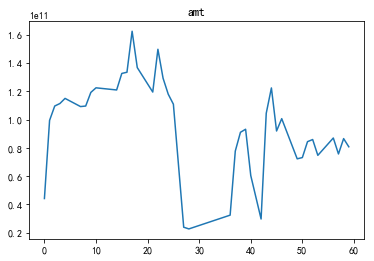

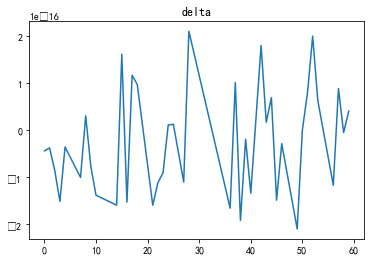

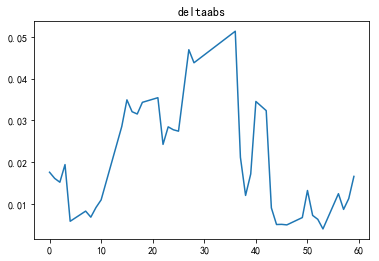

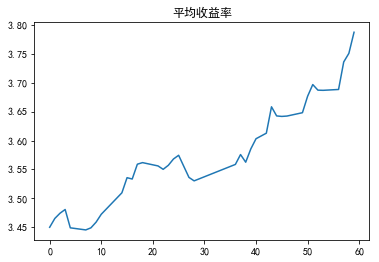

In [173]:
for i in daydf.columns:
    a=daydf[i].plot(title=i).get_figure().savefig(prefix+"/"+i+".png")
    plt.show()

In [182]:
fig.savefig("机构聚类.png")

NameError: name 'savepath' is not defined

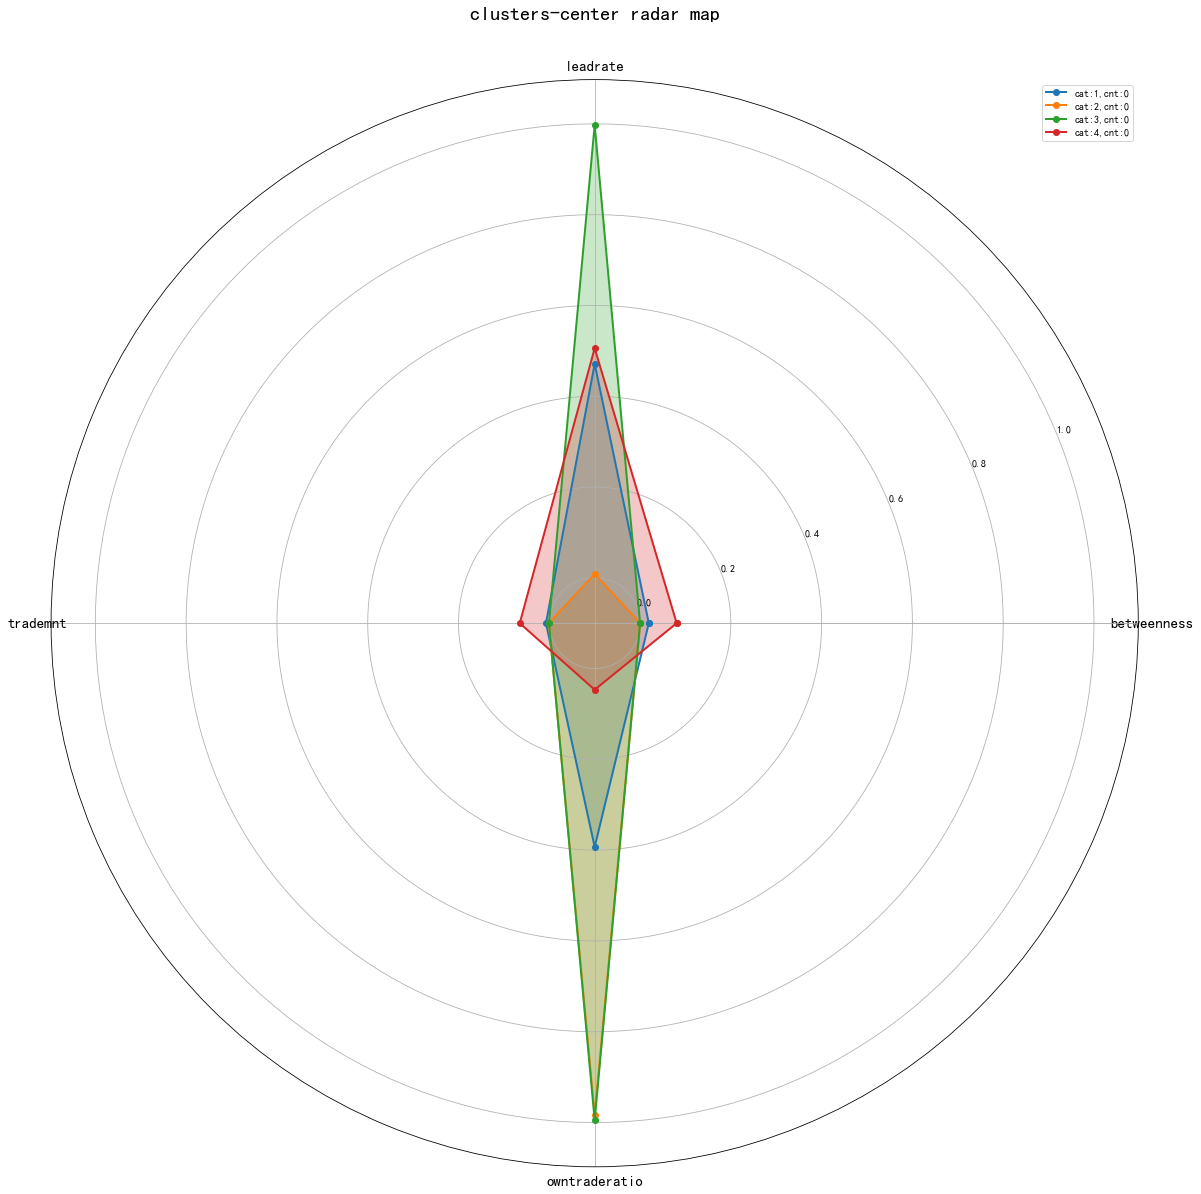

In [186]:
df=result_in[["betweenness","leadrate","trademnt","owntraderatio"]]
scaler = MinMaxScaler()
transformer = scaler.fit(df)
df = transformer.transform(df)
df=pd.DataFrame(df,index=result_in.index,columns=["betweenness","leadrate","trademnt","owntraderatio"])

km = KMeans(n_clusters=4, max_iter=1000).fit(df)
df['cluster'] = km.labels_
result_in.loc[:,'cluster']=km.labels_
zdf = pd.DataFrame(km.cluster_centers_,index=list(range(4)),columns=list(df.columns[0:-1]))


kdf=df.copy()
#df 
df = zdf.copy()


#雷达图
fig = plt.figure(figsize=(20,20))
#设置极坐标格式
ax = fig.add_subplot(111, polar=True)

center_df = df
max_v = center_df.values.max()
min_v = center_df.values.min()
feature = list(center_df.columns)

N = len(feature)
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.append(angles, angles[0])

for i, v in center_df.iterrows():


    angles = np.linspace(0, 2*np.pi, N, endpoint=False)
    center = np.concatenate((v, [v[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    ax.plot(angles, center, 'o-', linewidth=2, label='cat:%d,cnt:%d'%(i+1,v[-1]))
    ax.fill(angles, center, alpha=0.25)
    ax.set_thetagrids(angles*180/np.pi, feature,fontsize=15)
    ax.set_ylim(min_v-0.1, max_v+0.1)
    ax.grid(True)

plt.title('clusters-center radar map', fontsize=20)
plt.legend(loc='upper right', frameon = True)
fig.savefig(savepath+"/机构聚类.png")
plt.show()

439
2335


2019-09-02T00:00:00.000000000
2019-09-03T00:00:00.000000000
2019-09-04T00:00:00.000000000
2019-09-06T00:00:00.000000000
2019-09-09T00:00:00.000000000
2019-09-10T00:00:00.000000000
2019-09-11T00:00:00.000000000
2019-09-12T00:00:00.000000000
2019-09-16T00:00:00.000000000
2019-09-17T00:00:00.000000000
2019-09-18T00:00:00.000000000
2019-09-19T00:00:00.000000000
2019-09-20T00:00:00.000000000
2019-09-23T00:00:00.000000000
2019-09-24T00:00:00.000000000
2019-09-25T00:00:00.000000000
2019-09-26T00:00:00.000000000
2019-09-27T00:00:00.000000000
2019-09-29T00:00:00.000000000
2019-09-30T00:00:00.000000000
2019-10-08T00:00:00.000000000
2019-10-09T00:00:00.000000000
2019-10-10T00:00:00.000000000
2019-10-11T00:00:00.000000000
2019-10-28T00:00:00.000000000


'中泰信托中泰债券投资（HH1期）单一资金信托_2'

In [85]:


start_list = a["from"].value_counts().index
end_list = a["to"].value_counts().index
fromamtdf=a.groupby("from")["value"].agg("sum")
toamtdf=a.groupby("to")["value"].agg("sum")
nod=list(set(list(start_list)+list(end_list)))
nodelist1=[]
linklist1=[]
set1=list(set.intersection(set(start_list),set(end_list)))
#print(set1)
print(len(set1))
setl=[]
for i in set1:
    if ~(fromamtdf.loc[i]==toamtdf.loc[i]):
        setl.append(i)
set1=list(set(set1)-set(setl))
#print(set1)
#print(len(set1))
nods=[]
edgs=[]
maxam=0
maxname=""
amall=pd.DataFrame()
for i in nod:
    am1=0
    am2=0
    am=5
    if i in toamtdf.index:
        am2=toamtdf.loc[i]
    else:
        am2=0
    if i in fromamtdf.index:
        am1=fromamtdf.loc[i]
    else:
        am1=0
    if(am2-am1)/10>5:
        am=(am2-am1)/10
    else:
        am=5
    amall.loc[i,"1"]=am2-am1
    if am>maxam:
        maxam=am
        maxname=i
    if (i in set1):
        nodelist1.append({'name' : i,"symbolSize":am,"itemStyle":{"color":"#9467bd"}})
        nods.append([i,float(am2-am1)])
    else:
        nodelist1.append({'name' : i,"symbolSize":am,"itemStyle":{"size":500}})
        nods.append([i,float(am2-am1)])
print(maxname)
for i in a.index: 
    linklist1.append(opts.GraphLink(source=a.loc[i,"from"],target=a.loc[i,"to"],value=a.loc[i,"value"]))

prefix=path+"/"+pre
c=(
    Graph(init_opts=opts.InitOpts(width='4000px',height='2400px'))
    .add(
        "",
        nodelist1,
        linklist1, 
        repulsion=5000, 
        label_opts=opts.LabelOpts(font_size=10), 
        edge_symbol=["circle","arrow"], 
        edge_label=opts.LabelOpts(is_show=True, 
        position="middle", 
        formatter="{c}",font_size=5)
    )
    .set_global_opts()
    .render(prefix+"/"+"view_all.html")
)

325
九江银行股份有限公司_19


In [ ]:
##################################################################################################################################

In [19]:
my_df["券面总额"].sum()

3823659370000

In [20]:
df_grouped["券面总额"].sum()

664660740000

In [21]:
import matplotlib.pyplot as plt
my_df=my_df[(my_df[pricestr]<3.24) & (my_df[pricestr]>3.21)]
duration=(my_df[datestr].unique().max()-my_df[datestr].unique().min())/np.timedelta64(1,'D')+1
curdate=my_df[datestr].unique().min()
daydf=pd.DataFrame()
daysamt=[]
daysdelta=[]
daysdeltaabs=[]
days=[]
for i in my_df[datestr].unique():
    print(i)
    tradedaydf=my_df[my_df[datestr]==i]
    daysamt.append(tradedaydf[amtstr].values.sum())
    daysdelta.append((tradedaydf[amtstr].values*tradedaydf["delta"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
    daysdeltaabs.append((tradedaydf[amtstr].values*tradedaydf["deltaabs"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
    days.append(i)
    #curdate=curdate+np.timedelta64(1,'D')
daydf["amt"]=daysamt
daydf["delta"]=daysdelta
daydf["deltaabs"]=daysdeltaabs
daydf.index=days
for i in daydf.columns:
    a=daydf[i].plot(title=i).get_figure().savefig(i+".png")
    plt.show()
my_df=normaltradedf.copy()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
#plt.plot(x=df_grouped["价格区间"].values,y=df_grouped[amtstr])
import matplotlib.pyplot as plt
duration=(my_df[datestr].unique().max()-my_df[datestr].unique().min())/np.timedelta64(1,'D')+1
curdate=my_df[datestr].unique().min()
my_df=my_df[(my_df[pricestr]<=3.51) & (my_df[pricestr]>=3.47)]
daydf=pd.DataFrame()
daysamt=[]
daysdelta=[]
daysdeltaabs=[]
days=[]
daysp=[]
for i in range(int(duration)+1):
    tradedaydf=my_df[my_df[datestr]==curdate]
    if len(tradedaydf)>1:
        daysamt.append(tradedaydf[amtstr].values.sum())
        daysdelta.append((tradedaydf[amtstr].values*tradedaydf["delta"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
        daysdeltaabs.append((tradedaydf[amtstr].values*tradedaydf["deltaabs"].values).sum()/(tradedaydf[amtstr].sum()+0.000001))
        daysp.append(tradedaydf["平均收益率"].mean())
        days.append(i)
    curdate=curdate+np.timedelta64(1,'D')
daydf["amt"]=daysamt
daydf["delta"]=daysdelta
daydf["deltaabs"]=daysdeltaabs
daydf["平均收益率"]=daysp
daydf.index=days
for i in daydf.columns:
    a=daydf[i].plot(title=i).get_figure().savefig("1.png")
    plt.show()
my_df=normaltradedf.copy()

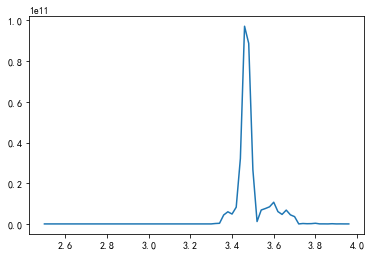

In [62]:
plt.plot(list(df_grouped["价格区间"].values),df_grouped[amtstr])

In [49]:
my_df

,成交日期,交易金额,买方交易账户中文简称,卖方交易账户中文简称,到期收益率,label,delta,deltaabs
3075,2021-10-22,10049750.0,宁波银行,山西证券,3.3470,"[3.33, 3.36)",0.019227,0.019227
83192,2021-09-23,10177920.0,东方证券,昆山农村商行,3.1925,"[3.18, 3.21)",0.003557,0.003557
83331,2021-09-23,50889550.0,长城证券,中国银行,3.1925,"[3.18, 3.21)",0.003557,0.003557
83332,2021-09-23,40706640.0,华西证券,华福证券,3.1940,"[3.18, 3.21)",0.005057,0.005057
83333,2021-09-23,30527490.0,昆山农村商行,上海银行,3.1950,"[3.18, 3.21)",0.006057,0.006057
...,...,...,...,...,...,...,...,...
257633,2021-10-22,80330080.0,中信建投证券,中欧添益一年持有期混合基金,3.3575,"[3.33, 3.36)",0.029727,0.029727
257634,2021-10-22,50320300.0,长城悦享回报债券基金,山西证券,3.3295,"[3.3, 3.33)",0.001727,0.001727
257635,2021-10-22,30196920.0,恒丰银行,日照银行,3.3275,"[3.3, 3.33)",-0.000273,0.000273
257636,2021-10-22,20109280.0,鄞州银行,长城证券,3.3410,"[3.33, 3.36)",0.013227,0.013227


In [50]:
import pandas as pd
import numpy as np
#my_df = pd.read_excel("jiujiang.csv",encoding="GBK")
#my_df = pd.read_csv("temp.csv",encoding="GBK")
my_ds = dc.dataset("ds://bond/bond2109-2110")
my_df = my_ds.read()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (49,72,73,75,76,79,80,110) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [51]:
list(my_df.columns)

['成交日期_年',
 '债券名称',
 '成交日期',
 '上市前交易标识',
 '业务时间',
 '业务模型',
 '买入方交易账户代码',
 '买入方托管账号',
 '买方21位交易账户代码',
 '买方21位机构代码',
 '买方交易员代码',
 '买方交易员传真',
 '买方交易员名称',
 '买方交易员电话',
 '买方交易成员群组',
 '买方交易账户中文全称',
 '买方交易账户中文简称',
 '买方交易账户英文全称',
 '买方交易账户英文简称',
 '买方代理机构21位码',
 '买方代理机构中文全称',
 '买方代理机构中文简称',
 '买方代理机构交易员代码',
 '买方代理机构交易员名称',
 '买方代理机构代码',
 '买方代理机构传真',
 '买方代理机构电话',
 '买方代理机构英文全称',
 '买方代理机构英文简称',
 '买方地址',
 '买方多级托管标识',
 '买方客户编码',
 '买方托管机构',
 '买方托管账户名称',
 '买方报价编号',
 '买方支付系统行号',
 '买方机构中文全称',
 '买方机构中文简称',
 '买方机构代码',
 '买方机构来源',
 '买方机构英文全称',
 '买方机构英文简称',
 '买方法人代表',
 '买方订单编号',
 '买方资金开户行名称',
 '买方资金账号',
 '买方资金账户名称',
 '交易产品代码',
 '交易意向编号',
 '交易指令编码',
 '交易方式代码',
 '交易模型代码',
 '交易记录编号',
 '交易货币',
 '债券代码',
 '债券币种',
 '债券标识综合值',
 '分账参考编号',
 '创建时间',
 '卖出方交易账户代码',
 '卖出方托管账号',
 '卖方21位交易账户代码',
 '卖方21位机构代码',
 '卖方交易员代码',
 '卖方交易员传真',
 '卖方交易员名称',
 '卖方交易员电话',
 '卖方交易成员群组',
 '卖方交易账户中文全称',
 '卖方交易账户中文简称',
 '卖方交易账户英文全称',
 '卖方交易账户英文简称',
 '卖方代理机构21位码',
 '卖方代理机构中文全称',
 '卖方代理机构中文简称',
 '卖方代理机构交易员代码',
 '卖方代理机构交易员名称',
 '卖方代理机构代码',
 '卖方代理机构传真'

In [54]:
my_df.loc[236353,:][['买方交易账户中文全称',
 '买方交易账户中文简称',
 '买方交易账户英文全称',
 '买方交易账户英文简称',
 '买方代理机构21位码',
 '买方代理机构中文全称']]

买方交易账户中文全称           广州银行股份有限公司
买方交易账户中文简称                 广州银行
买方交易账户英文全称    Bank of Guangzhou
买方交易账户英文简称                 GZCB
买方代理机构21位码                  NaN
买方代理机构中文全称                  NaN
Name: 236353, dtype: object

In [216]:
for i in daydf.columns:
    daydf[i].plot(title=i).get_figure().savefig(i+".png")
    plt.close()